# OK Cupid Dataset

This dataset consist of a majority of catagorical veriables, there fore my approach to this will be: 

    1) preliminary data exploration
    2) data cleaning 
    3) filling in missing values
    4) encoding catagorical values
    
    5) unbiasing the data
        - the data is disproportionatly populated by people in their mid to late 20s
        - the magority of data is dominated by single people, which needs to be removed as it is not an outcome predictor
        - the sex colum need to be unbiased as there are more men than women. 
        
    6) Form Hypothesis 
        - We want to predict the statuse of some based on key characteristics, for example: 
            if the person is within specific age group
            if a person has particular interest and characteristics
            (this could be achieved through sorting data into specific groupings the examing the affect)
        - 
    


In [1]:
# Import libraries 

# Import data science libraries 
import pandas as pd
import re # regulate expression library 
import numpy as np

# Import data visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns

# import csv library
import csv

# Import data splitting librar
from sklearn.model_selection import train_test_split

#Import machine learning algorithm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Import metrics
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Load dataset direct from PC, importing form website would require a direct URL from the UCL website
okcupid = pd.read_csv('Desktop/Data Science Career Change/WIP Projects/WIP OK Cupid/OKCupid-Date-A-Scientist-Starter/OKCupid-Date-A-Scientist-Starter/profiles.csv',encoding='utf-8')


# Preliminary Data Exploration 

In [3]:
okcupid.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at:<br />\nhttp://bag...   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

                          location  \
0  south san francisco, california   
1              oakland, california   
2        san francisco, california   
3             berkeley, california   
4        san francisco, california   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   
1  doesn&rsquo;t have kids, but might want them    straight   
2                                           NaN    straight   
3                       doesn&rsquo;t want kids    straight   
4                                           NaN    straight   

                        pets                                  religion sex  \
0  likes dogs and likes cats     agnosticism and very serious about it   m   
1  likes dogs and likes cats  agnosticism but not too serious about it   m   
2                   has cats                                       NaN   m   
3                 likes cats                                       NaN   m   
4  likes dogs and likes cats                                       NaN   m   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks     status  
0                                            english     single  
1  english (fluently), spanish (poorly), french (...     single  
2                               english, french, c++  available  
3                           english, german (poorly)     single  
4                                            english     single  

[5 rows x 31 columns]

In [4]:
okcupid['sex'].value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [5]:
okcupid['status'].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [6]:
# Filter for users aged 25 to 29
filtered_25 = okcupid[(okcupid['age'] >= 25) & (okcupid['age'] <= 30)]

# Filter for users aged 55 to 60
filtered_55 = okcupid[(okcupid['age'] >= 55) & (okcupid['age'] <= 60)]

In [7]:
# Count occurrences of males and females
sex_counts_25 = filtered_25['sex'].value_counts()
sex_counts_55 = filtered_55['sex'].value_counts()

print(sex_counts_25)
print(sex_counts_55)

m    13128
f     7839
Name: sex, dtype: int64
f    708
m    697
Name: sex, dtype: int64


In [8]:
# Count occurrences of males and females
status_25 = filtered_25['status'].value_counts()
status_55 = filtered_55['status'].value_counts()

print(status_25)
print(status_55)

single            19409
seeing someone      883
available           594
married              79
unknown               2
Name: status, dtype: int64
single            1343
available           37
married             12
seeing someone      12
unknown              1
Name: status, dtype: int64


In [9]:
# Define the statuses to keep
statuses_to_keep = ["married", "available", "seeing someone"]

# Filter the dataframe
filtered_status_25 = filtered_25[filtered_25['status'].isin(statuses_to_keep)]
filtered_status_55 = filtered_55[filtered_55['status'].isin(statuses_to_keep)]

# Get value counts and unnormalize
status_update_25un = filtered_status_25['status'].value_counts()
status_update_55un = filtered_status_55['status'].value_counts()

# Get value counts and normalize
status_update_25 = filtered_status_25['status'].value_counts(normalize=True) * 100
status_update_55 = filtered_status_55['status'].value_counts(normalize=True) * 100

#print(status_update_25)

#print(status_update_55)


# Create a DataFrame for better formatting
status_unnormalised = pd.DataFrame({'Age 25-30': status_update_25un, 'Age 55-60': status_update_55un})
status_normalised = pd.DataFrame({'Age 25-30': status_update_25, 'Age 55-60': status_update_55})

# Display formatted output with aligned columns
# Print unnormalized dataframe
print(status_unnormalised)
print("\n" + "-"*40 + "\n")  # Adds a separator line with space

# Print normalized dataframe
print(status_normalised)



                Age 25-30  Age 55-60
available             594         37
married                79         12
seeing someone        883         12

----------------------------------------

                Age 25-30  Age 55-60
available       38.174807  60.655738
married          5.077121  19.672131
seeing someone  56.748072  19.672131


In [10]:
# Add styling to the DataFrames
styled_unnormalised = status_unnormalised.style.set_caption("Unnormalized Status Distribution")\
    .set_table_styles([{'selector': 'table', 'props': [('border', '2px solid black')]}])

styled_normalised = status_normalised.style.set_caption("Normalized Status Distribution")\
    .set_table_styles([{'selector': 'table', 'props': [('border', '2px solid black')]}])

# Display styled DataFrames
display(styled_unnormalised)
print("\n" + "-"*40 + "\n")  # Separator for clarity
display(styled_normalised)



----------------------------------------



## Initial Graphical Summary

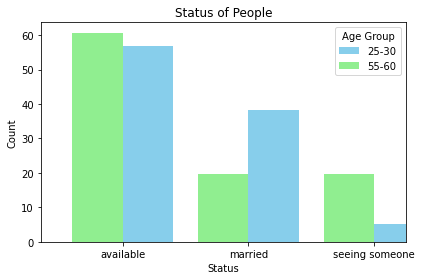

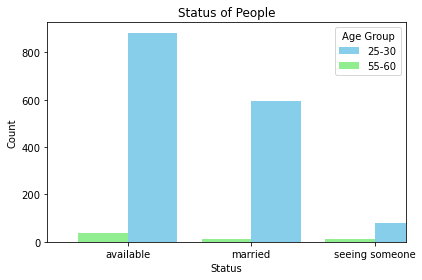

In [11]:
# Plot the data

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each dataset on the same axes with labels for the legend
status_update_25.plot(kind='bar', color='skyblue', position=0, width=0.4, ax=ax, label='25-30')
status_update_55.plot(kind='bar', color='lightgreen', position=1, width=0.4, ax=ax, label='55-60')

# Add the legend
ax.legend(title="Age Group")

# Adjust labels and title
plt.title('Status of People')
plt.xlabel('Status')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Keep labels readable
plt.tight_layout()
plt.show()

################

# Plot the data

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each dataset on the same axes with labels for the legend
status_update_25un.plot(kind='bar', color='skyblue', position=0, width=0.4, ax=ax, label='25-30')
status_update_55un.plot(kind='bar', color='lightgreen', position=1, width=0.4, ax=ax, label='55-60')

# Add the legend
ax.legend(title="Age Group")

# Adjust labels and title
plt.title('Status of People')
plt.xlabel('Status')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Keep labels readable
plt.tight_layout()
plt.show()

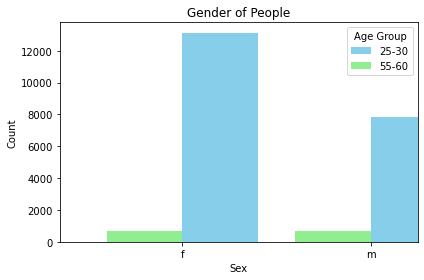

In [12]:
import matplotlib.pyplot as plt



# Plot the data

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each dataset on the same axes with labels for the legend
sex_counts_25.plot(kind='bar', color='skyblue', position=0, width=0.4, ax=ax, label='25-30')
sex_counts_55.plot(kind='bar', color='lightgreen', position=1, width=0.4, ax=ax, label='55-60')

# Add the legend
ax.legend(title="Age Group")

# Adjust labels and title
plt.title('Gender of People')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Keep labels readable
plt.tight_layout()
plt.show()


After the information has sperated into yonger and older age groups we conclude: 

    - there is an higher percentage of younger people that are married and single 
    - old peo are almost evenly balaced between sex type compared to younge people. 
    - There are significantly more young  and single people than old. 
    - the proportion of groups only change marginally with age be a definate trend exists. 
    
    - The single and young group should be analysed further for any patterns.
    - the whole data set should be balance to determine any comparitive variation. 

# Balancing the Data 

## Gender

## Undersampling (reducing the majority group)

In [13]:
import pandas as pd

# Filter dataset for ages 25 to 30
#filtered_df = okcupid[(okcupid['age'] >= 25) & (okcupid['age'] <= 30)]

# Find the minimum count across sexes
min_count = okcupid['age'].value_counts().min()

# Sample equal amounts from each sex group
underbalanced_df_sex = okcupid.groupby('age').sample(n=min_count, random_state=42)

underbalanced_df_sex.shape


(54, 31)

In [14]:
underbalanced_df_sex['age'].value_counts()

18     1
58     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
59     1
19     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
109    1
46     1
45     1
44     1
43     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
110    1
Name: age, dtype: int64

# Oversampling (Increasing the minority group)

In [15]:
from sklearn.utils import resample

# Get the frequency of each age group
age_counts = okcupid['age'].value_counts()
max_count = age_counts.max()

# Resample each age group to match the max_count
balanced_age_dfs = []
for age in age_counts.index:
    age_df = okcupid[okcupid['age'] == age]
    balanced_df = resample(age_df, replace=True, n_samples=max_count, random_state=42)
    balanced_age_dfs.append(balanced_df)

# Combine all resampled groups
balanced_okcupid = pd.concat(balanced_age_dfs)

# Check the distribution
# print(balanced_okcupid['age'].value_counts())

balanced_okcupid['age'].value_counts()

26     3724
59     3724
48     3724
49     3724
50     3724
51     3724
52     3724
18     3724
56     3724
54     3724
55     3724
57     3724
53     3724
58     3724
27     3724
60     3724
61     3724
62     3724
63     3724
64     3724
65     3724
66     3724
67     3724
68     3724
69     3724
110    3724
47     3724
46     3724
19     3724
45     3724
28     3724
25     3724
29     3724
24     3724
30     3724
31     3724
23     3724
32     3724
33     3724
22     3724
34     3724
35     3724
36     3724
37     3724
38     3724
21     3724
39     3724
42     3724
40     3724
41     3724
20     3724
43     3724
44     3724
109    3724
Name: age, dtype: int64

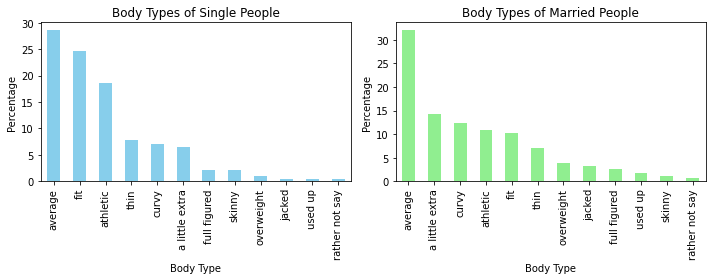

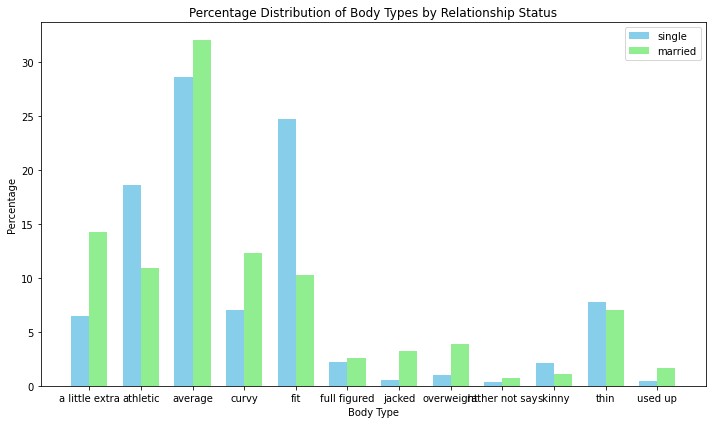

In [16]:
# Create a DataFrame
df = pd.DataFrame(balanced_okcupid)

# Filter data for 'Single' and 'Fit'
single_data = balanced_okcupid[balanced_okcupid['status'] == 'single']
married_data = balanced_okcupid[balanced_okcupid['status'] == 'married']

# Count body types
single_body_counts = single_data['body_type'].value_counts(normalize=True) *100
married_body_counts = married_data['body_type'].value_counts(normalize=True) *100

# Plot for 'Single'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
single_body_counts.plot(kind='bar', color='skyblue')
plt.title('Body Types of Single People')
plt.xlabel('Body Type')
plt.ylabel('Percentage')

# Plot for 'Fit'
plt.subplot(1, 2, 2)
married_body_counts.plot(kind='bar', color='lightgreen')
plt.title('Body Types of Married People')
plt.xlabel('Body Type')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

####################


# Align data for plotting
body_types = sorted(set(single_body_counts.index).union(set(married_body_counts.index)))
single_percent = [single_body_counts.get(bt, 0) for bt in body_types]
married_percent = [married_body_counts.get(bt, 0) for bt in body_types]

# Plot grouped bar chart
x = np.arange(len(body_types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, single_percent, width, label='single', color='skyblue')
ax.bar(x + width/2, married_percent, width, label='married', color='lightgreen')

# Add labels and title
ax.set_xlabel('Body Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage Distribution of Body Types by Relationship Status')
ax.set_xticks(x)
ax.set_xticklabels(body_types)
ax.legend()

plt.tight_layout()
plt.show()



In [17]:
# We can see there are some general characteristic differences between sincle and married people whic may allow predications 
# to be be made 

C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


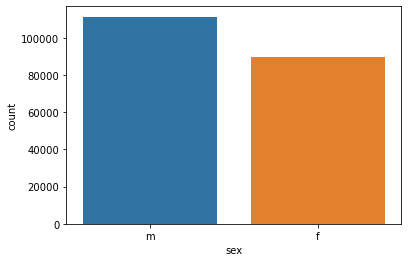

In [18]:
sns.countplot(balanced_okcupid["sex"])
plt.show()

# How many single meals compared to femails


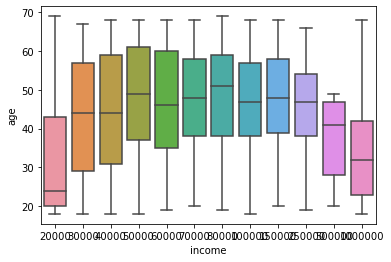

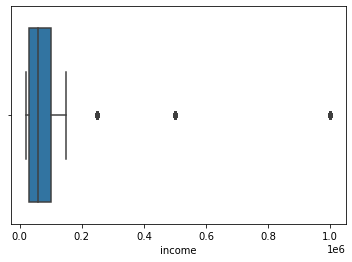

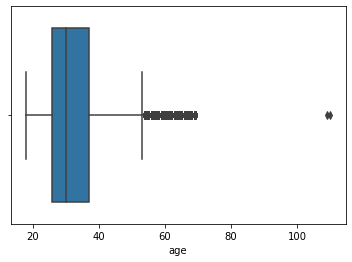

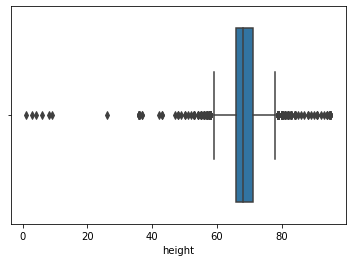

In [19]:

# Create the plot
filtered_income = balanced_okcupid[balanced_okcupid['income'] > 1000 & (balanced_okcupid['income'] < 1000000)]

sns.boxplot(x='income', y='age',  data=filtered_income)
plt.show()

sns.boxplot(x='income',  data=filtered_income)
plt.show()

sns.boxplot(x='age',  data=okcupid)
plt.show()


sns.boxplot(x='height',  data=okcupid)
plt.show()



In [20]:
balanced_okcupid['income'].value_counts()


-1          162166
 20000        7669
 100000       6543
 80000        4820
 50000        3817
 30000        3064
 40000        2934
 70000        2906
 150000       2763
 60000        2532
 1000000      1139
 250000        591
 500000        152
Name: income, dtype: int64

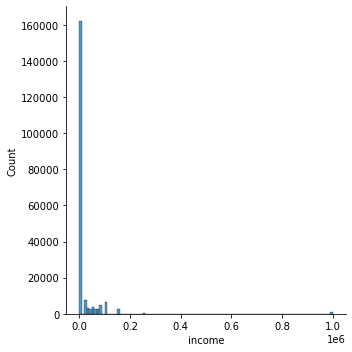

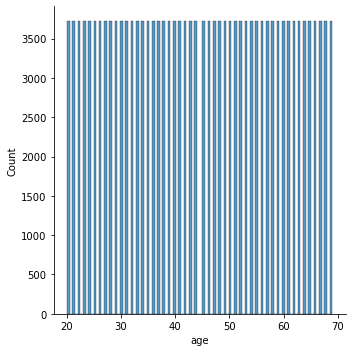

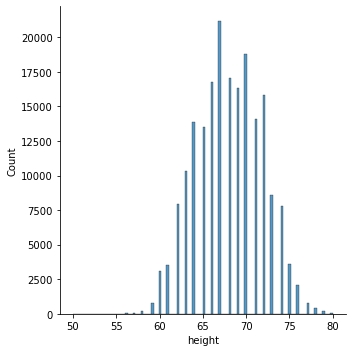

In [21]:
# historgram 

# X > age of population
# Y > status (single as a line history plot and then add other catagories)

# For histogram 2 substitute status for diet etc...

# histogram
sns.displot(balanced_okcupid.income, bins=100, kde=False)
plt.show()

# Filter the DataFrame to include only rows where height is between 50 and 80
filtered_age = balanced_okcupid[(balanced_okcupid['age'] >= 20) & (balanced_okcupid['age'] <= 70)]
# Create a histogram of the height column from the filtered data
sns.displot(filtered_age['age'], bins=100, kde=False)
plt.show()

# Filter the DataFrame to include only rows where height is between 50 and 80
filtered_height = balanced_okcupid[(balanced_okcupid['height'] >= 50) & (balanced_okcupid['height'] <= 80)]
# Create a histogram of the height column from the filtered data
sns.displot(filtered_height['height'], bins=100, kde=False)
plt.show()




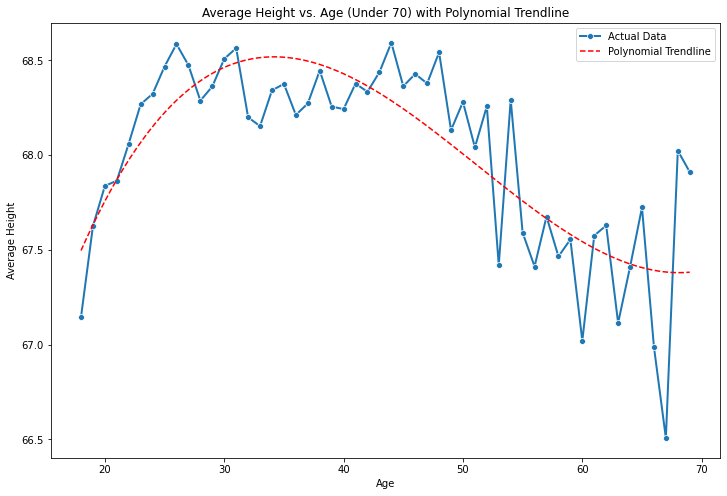

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data for ages under 70
filtered_data = balanced_okcupid[balanced_okcupid['age'] < 70]

# Calculate the average height per age group
avg_height_per_age = filtered_data.groupby('age')['height'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x=avg_height_per_age['age'], y=avg_height_per_age['height'], marker='o', linewidth=2, label="Actual Data")

# Fit a polynomial regression curve (degree 3 for better fit)
z = np.polyfit(avg_height_per_age['age'], avg_height_per_age['height'], 3)  # 3rd-degree polynomial fit
p = np.poly1d(z)

# Plot the fitted curve
ages_smooth = np.linspace(avg_height_per_age['age'].min(), avg_height_per_age['age'].max(), 300)  # Smooth X values
plt.plot(ages_smooth, p(ages_smooth), linestyle="dashed", color="red", label="Polynomial Trendline")

# Labels and title
plt.xlabel('Age')
plt.ylabel('Average Height')
plt.title('Average Height vs. Age (Under 70) with Polynomial Trendline')
plt.legend()

plt.show()





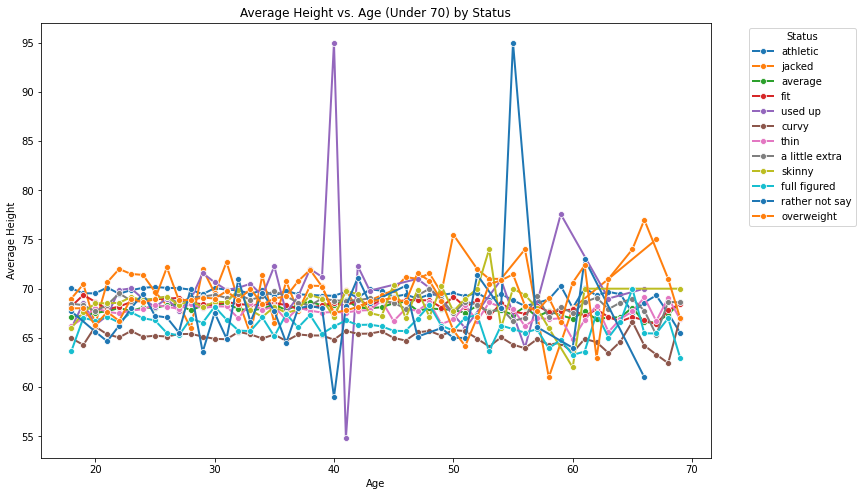

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data for ages under 70 and selected body types
selected_body_types = ['average', 'fit', 'curvy', 'athletic', 'thin', 'a little extra', 'skinny', 'full figured', 
                       'rather not say', 'used up', 'jacked', 'overweight']
filtered_data = balanced_okcupid[(balanced_okcupid['age'] < 70) & (balanced_okcupid['body_type'].isin(selected_body_types))]

# Calculate the average height per age and status group
avg_height_per_group = filtered_data.groupby(['age', 'body_type'])['height'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))

# Get unique status categories
status_categories = filtered_data['body_type'].unique()

for status in status_categories:
    subset = avg_height_per_group[avg_height_per_group['body_type'] == status]
    sns.lineplot(x=subset['age'], y=subset['height'], marker='o', linewidth=2, label=f"{status}")

plt.xlabel('Age')
plt.ylabel('Average Height')
plt.title('Average Height vs. Age (Under 70) by Status')
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


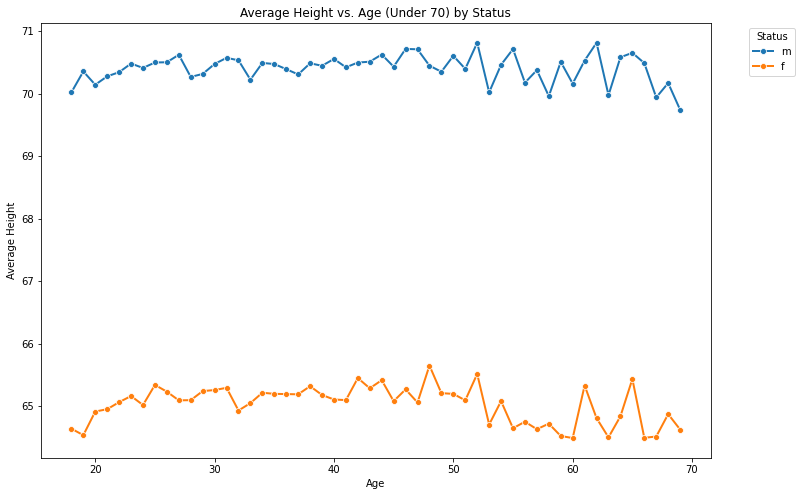

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data for ages under 70 and selected body types
selected_body_types = ['average', 'fit', 'curvy', 'athletic', 'thin', 'a little extra', 'skinny', 'full figured', 
                       'rather not say', 'used up', 'jacked', 'overweight']
filtered_data = balanced_okcupid[(balanced_okcupid['age'] < 70) & (balanced_okcupid['body_type'].isin(selected_body_types))]

# Calculate the average height per age and status group
avg_height_per_group = filtered_data.groupby(['age', 'sex'])['height'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))

# Get unique status categories
status_categories = filtered_data['sex'].unique()

for status in status_categories:
    subset = avg_height_per_group[avg_height_per_group['sex'] == status]
    sns.lineplot(x=subset['age'], y=subset['height'], marker='o', linewidth=2, label=f"{status}")

plt.xlabel('Age')
plt.ylabel('Average Height')
plt.title('Average Height vs. Age (Under 70) by Status')
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

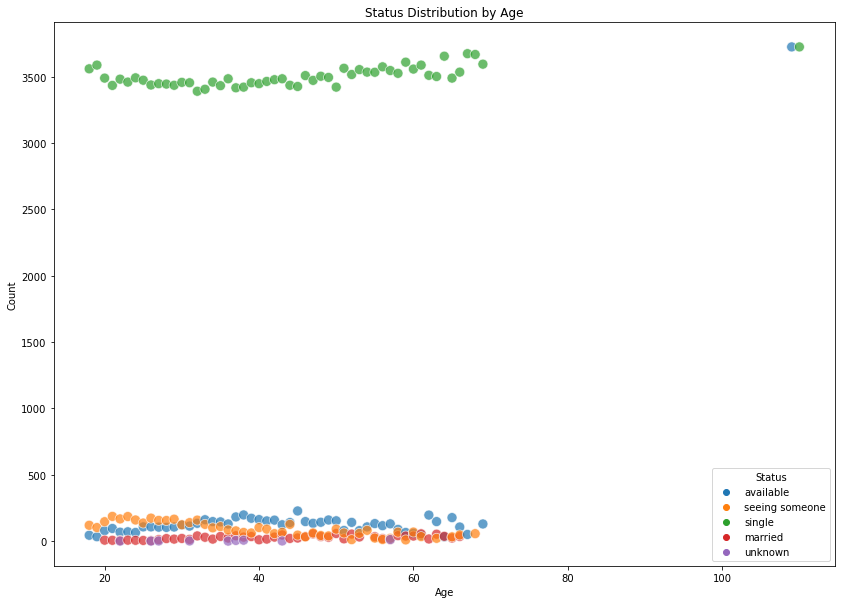

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming 'balanced_okcupid' is your DataFrame containing 'age' and 'status' columns

# Count occurrences of 'status' per age
count_data = balanced_okcupid.groupby(['age', 'status']).size().reset_index(name='count')

plt.figure(figsize=(14, 10))

# Create scatterplot with value counts on the y-axis
sns.scatterplot(data=count_data, x='age', y='count', hue='status', alpha=0.7, s=100)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Status Distribution by Age')
plt.legend(title='Status')

plt.show()



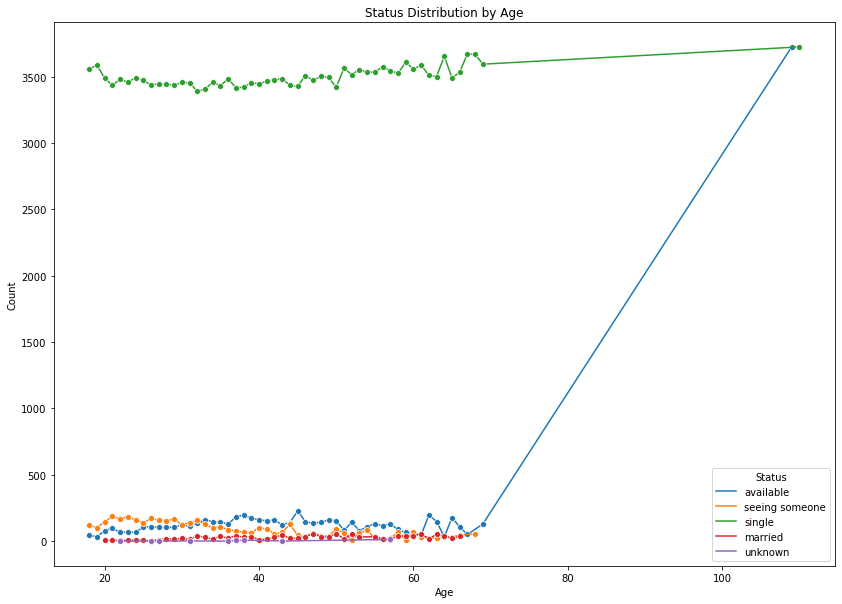

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count occurrences of 'status' per age
count_data = balanced_okcupid.groupby(['age', 'status']).size().reset_index(name='count')

plt.figure(figsize=(14, 10))

# Create line plot
sns.lineplot(data=count_data, x='age', y='count', hue='status', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Status Distribution by Age')
plt.legend(title='Status')

plt.show()


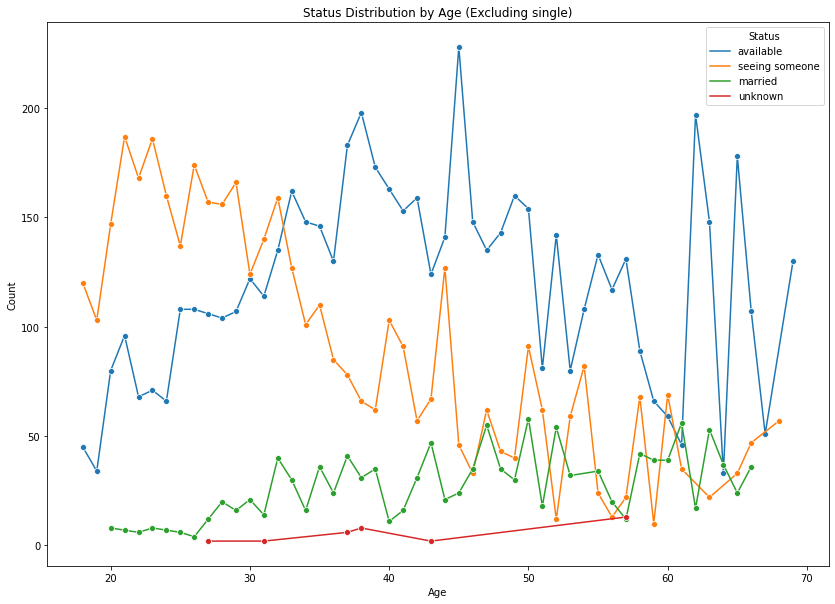

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count occurrences of 'status' per age
count_data = balanced_okcupid.groupby(['age', 'status']).size().reset_index(name='count')

# Filter out ages over 70
count_data = count_data[count_data['age'] <= 70]

# Remove statuses that appear only once
count_data = count_data[count_data['count'] > 1]

# Exclude 'single' category
count_data = count_data[count_data['status'] != "single"]

plt.figure(figsize=(14, 10))

# Create line plot
sns.lineplot(data=count_data, x='age', y='count', hue='status', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Status Distribution by Age (Excluding single)')
plt.legend(title='Status')

plt.show()



In [28]:
# All single people aged 25 to 30 value count 
# sort by 

C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


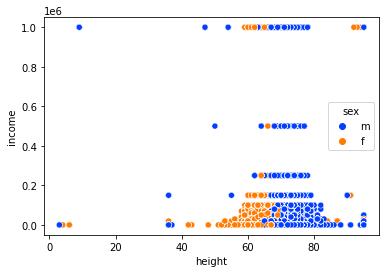

In [29]:
# Multivaliate analysis 
sns.scatterplot(balanced_okcupid.height, balanced_okcupid.income, hue = balanced_okcupid.sex, palette='bright')
plt.show()





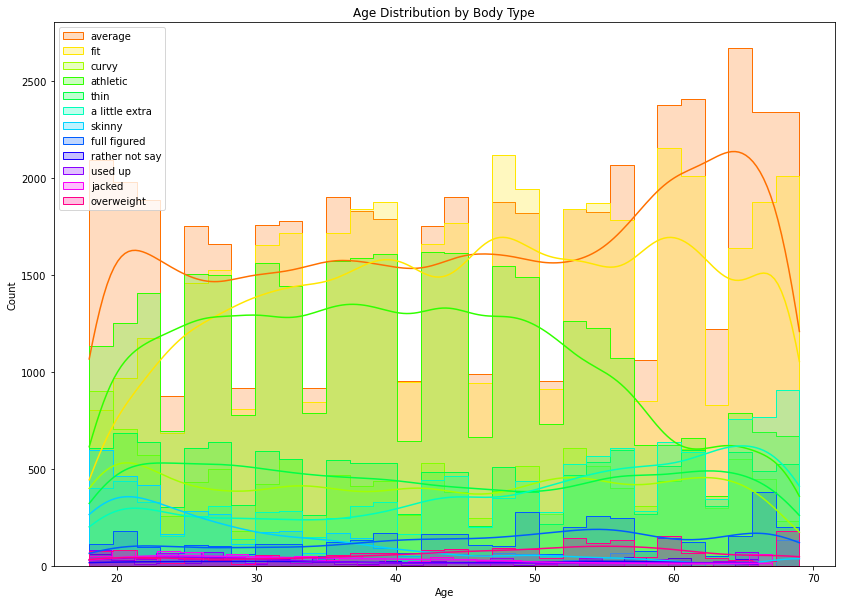

In [30]:
palette = sns.color_palette("hsv", len(selected_body_types))


# Create a line plot for each body type
plt.figure(figsize=(14, 10))

for i, body_type in enumerate(selected_body_types):
    subset = filtered_data[filtered_data['body_type'] == body_type]
    sns.histplot(subset['age'], label=body_type, bins=30, kde=True, element='step', stat='count', color=palette[i], alpha = 0.25)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Body Type')
plt.legend()

plt.show()

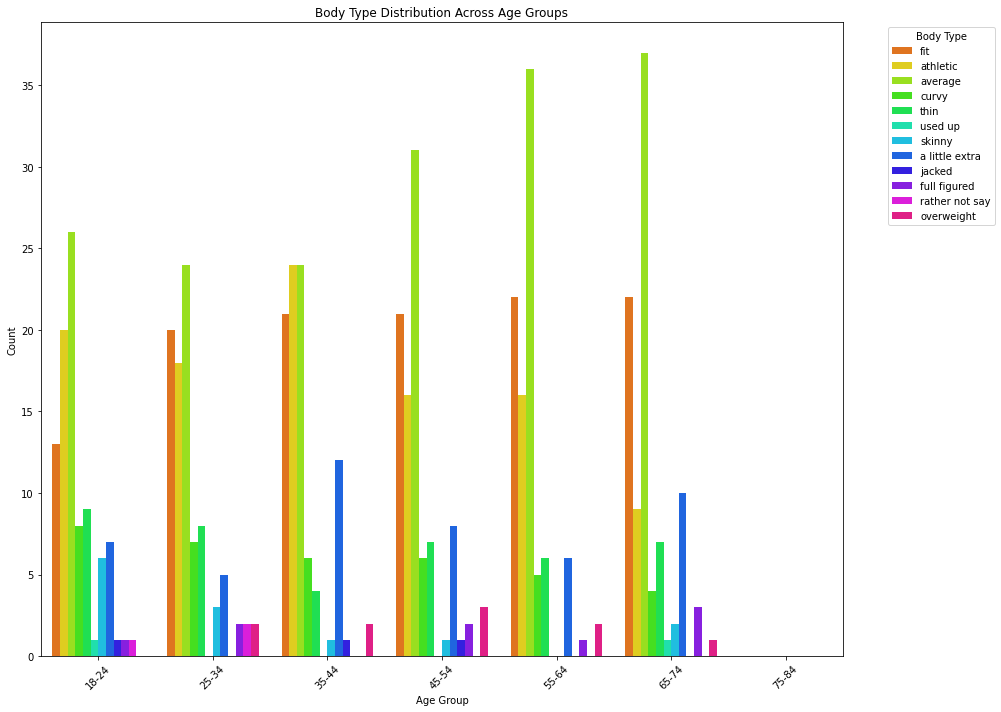

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
# Assuming 'okcupid' is your DataFrame with 'body_type' and 'age' columns

# Define age bins
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']

# Create age groups
balanced_okcupid['age_group'] = pd.cut(okcupid['age'], bins=age_bins, labels=age_labels, right=False)

# Stratified sampling: sample equal number from each age group
sampled_data = balanced_okcupid.groupby('age_group').apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)

# Plot the distribution of body types within each age group
plt.figure(figsize=(14, 10))
sns.countplot(data=sampled_data, x='age_group', hue='body_type', palette='hsv')
plt.title('Body Type Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
# Group by 'sex' and count occurrences in 'drugs'
drug_counts_by_sex = balanced_okcupid.groupby('sex')['drugs'].value_counts()

# Display the result
print(drug_counts_by_sex)


sex  drugs    
f    never        64114
     sometimes     7329
     often          412
m    never        75879
     sometimes    12748
     often          832
Name: drugs, dtype: int64


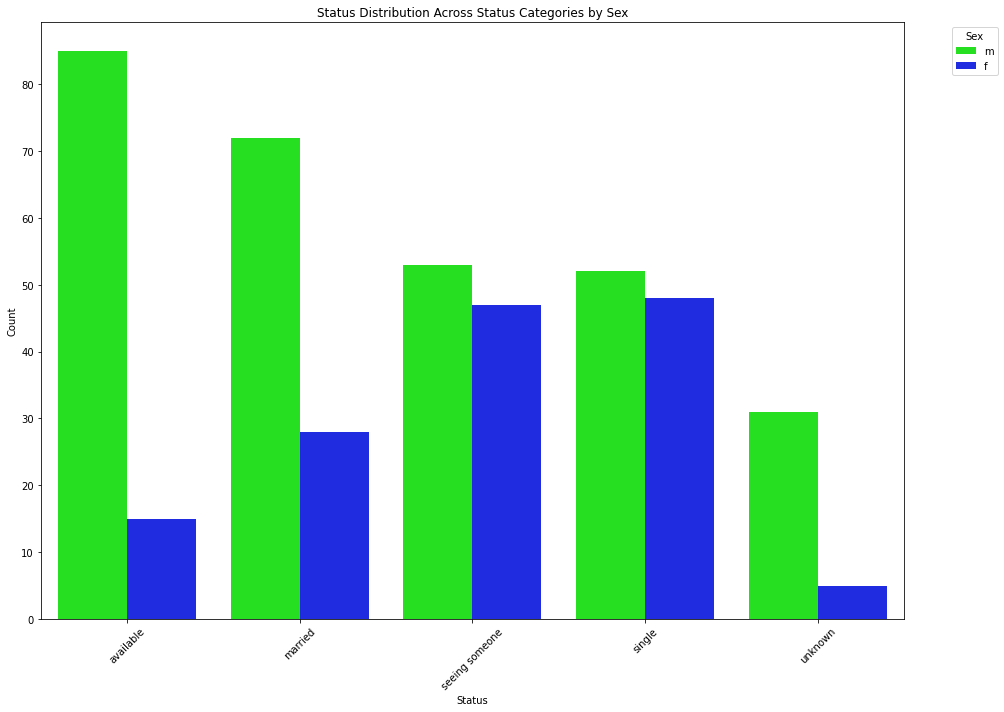

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stratified sampling: sample equal number from each status category
sampled_data = balanced_okcupid.groupby('status').apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)

# Plot the distribution of status within each status category, incorporating sex
plt.figure(figsize=(14, 10))
sns.countplot(data=sampled_data, x='status', hue='sex', palette='hsv')
plt.title('Status Distribution Across Status Categories by Sex')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



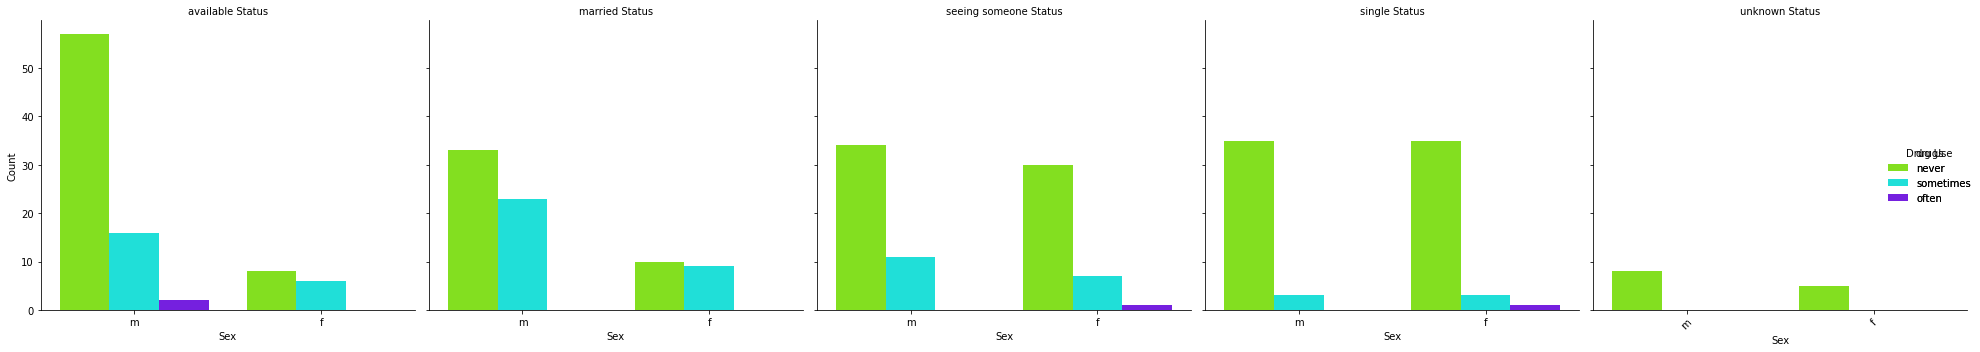

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sampled_data = balanced_okcupid.groupby('status').apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)

# Create a categorical plot with separate plots for each status
g = sns.catplot(
    data=sampled_data,
    x='sex',
    hue='drugs',
    col='status',
    kind='count',
    palette='hsv',
    height=5,
    aspect=1
)

g.set_axis_labels("Sex", "Count")
g.set_titles("{col_name} Status")
g.add_legend(title='Drug Use')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [35]:
balanced_okcupid.shape

(201096, 32)

In [36]:
balanced_okcupid.describe()

age         height          income
count  201096.000000  201087.000000   201096.000000
mean       45.944444      68.488530    18527.408969
std        19.294469       5.329335    81836.333226
min        18.000000       3.000000       -1.000000
25%        31.000000      65.000000       -1.000000
50%        44.500000      68.000000       -1.000000
75%        58.000000      71.000000       -1.000000
max       110.000000      95.000000  1000000.000000

In [37]:
print(balanced_okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201096 entries, 50766 to 25324
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   age          201096 non-null  int64   
 1   body_type    184203 non-null  object  
 2   diet         116482 non-null  object  
 3   drinks       184824 non-null  object  
 4   drugs        161314 non-null  object  
 5   education    174630 non-null  object  
 6   essay0       175813 non-null  object  
 7   essay1       167419 non-null  object  
 8   essay2       162470 non-null  object  
 9   essay3       163218 non-null  object  
 10  essay4       158970 non-null  object  
 11  essay5       159570 non-null  object  
 12  essay6       149073 non-null  object  
 13  essay7       153002 non-null  object  
 14  essay8       133914 non-null  object  
 15  essay9       152747 non-null  object  
 16  ethnicity    177928 non-null  object  
 17  height       201087 non-null  float64 
 18  i

In [38]:
# Examine rows with Missing Values 
balanced_okcupid[balanced_okcupid.isnull().any(axis=1)] # filter any rows to include any row whose value is null

age body_type             diet    drinks  drugs  \
56457   26       NaN              NaN  socially  never   
14046   26    jacked              NaN  socially  never   
20786   26   average         anything  socially  never   
18177   26  athletic              NaN    rarely  never   
17523   26   average  mostly anything  socially  never   
...    ...       ...              ...       ...    ...   
25324  109  athletic     mostly other       NaN  never   
25324  109  athletic     mostly other       NaN  never   
25324  109  athletic     mostly other       NaN  never   
25324  109  athletic     mostly other       NaN  never   
25324  109  athletic     mostly other       NaN  never   

                               education  \
56457      working on college/university   
14046  graduated from college/university   
20786         working on masters program   
18177  graduated from college/university   
17523  graduated from college/university   
...                                  ...   
25324         working on masters program   
25324         working on masters program   
25324         working on masters program   
25324         working on masters program   
25324         working on masters program   

                                                  essay0  \
56457  i am a student at the art institute in san fra...   
14046  i'm originally from new jersey. you can tell f...   
20786  hiiii : i'm from the east coast : and i'm an a...   
18177  i play a lot of tennis and love to run bleache...   
17523  i'm a pretty chill guy. i love life with a lit...   
...                                                  ...   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   

                                                  essay1  \
56457  going to school for tv and film production. i ...   
14046  shit i've done:<br />\nlost 100 lbs (and still...   
20786  welllllll : i have one year left in grad schoo...   
18177                                                NaN   
17523  i work in the video game industry and am very ...   
...                                                  ...   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   

                                                  essay2  \
56457  writting, dancing, singing, and just getting a...   
14046  being spontaneous<br />\ntaking things apart a...   
20786  things like : art : design : being a funny gir...   
18177                                   sports, scrabble   
17523              making people laugh. watching movies.   
...                                                  ...   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   
25324                                                NaN   

                                                  essay3  ...  \
56457                               my eyes or my smile.  ...   
14046  a lady told me that she wanted to steal my hai...  ...   
20786  i do not know! i think my eyes and eyebrows, s...  ...   
18177                                    my hair or eyes  ...   
17523             smile? i've never really asked people.  ...   
...                                                  ...  ...   
25324                                            nothing  ...   
25324                                            nothing  ...   
25324                            

In [39]:
print(balanced_okcupid.drugs.unique()) # print all unique values in a particular column
print(balanced_okcupid.ethnicity.unique())

['sometimes' 'never' nan 'often']
['white' 'middle eastern' 'asian' 'other' 'pacific islander'
 'asian, white' 'hispanic / latin, white' nan 'indian' 'hispanic / latin'
 'asian, pacific islander, white' 'black, white' 'black'
 'native american, hispanic / latin' 'middle eastern, white'
 'indian, other' 'black, native american, white' 'native american, white'
 'black, other' 'black, white, other' 'asian, pacific islander'
 'white, other' 'asian, hispanic / latin, white' 'asian, hispanic / latin'
 'black, native american, pacific islander, white'
 'asian, pacific islander, white, other' 'middle eastern, other'
 'asian, white, other' 'native american, other'
 'asian, black, native american, hispanic / latin, white'
 'black, hispanic / latin' 'native american, white, other' 'asian, other'
 'middle eastern, indian, other' 'black, native american'
 'asian, black, indian' 'black, native american, hispanic / latin, white'
 'asian, hispanic / latin, white, other' 'pacific islander, white'
 'asi

Conclusion 

# Data Cleaning, Wrangling and Tidying 

Preliminary data cleaning

In [40]:
# From priliminary observation I cannot detect any duplicate rows 
# the .drop_duplicates() function removes duplicate rows
balanced_okcupid = balanced_okcupid.drop_duplicates() 

# Total number of rows
total_rows = len(balanced_okcupid)

# Number of unique rows
unique_rows = len(balanced_okcupid.drop_duplicates())

# Number of duplicate rows
duplicate_rows = total_rows - unique_rows

# Print the number of duplicates
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [41]:
# it looks like all of the data is in lowercase, however I will scan the data to make sure.
balanced_okcupid.columns = map(str.lower, balanced_okcupid.columns)

In [42]:
# axis=1` refers to the columns, `axis=0` would refer to the rows
# In the dictionary the key refers to the original column name and the value refers to the new column name {'oldname1': 'newname1', 'oldname2': 'newname2'}
balanced_okcupid = balanced_okcupid.rename({'essay0': 'about_me', 'essay1': 'employment', 'essay2': 'hobbies' ,'essay3': 'appearance','essay4': 'fouvourite_music_and_tv','essay5': 'likes','essay6': 'aspirations','essay7': 'weekend','essay8': 'fun_fact','essay9': 'ideal_date'}, axis=1)


# the .head(10) function will show us the first 10 rows in our dataset
balanced_okcupid.head(1)

age body_type               diet    drinks      drugs  \
50766   26  athletic  strictly anything  socially  sometimes   

                               education  \
50766  dropped out of college/university   

                                                about_me  \
50766  i grew up in texas(21 years). had a short stin...   

                                              employment  \
50766  for quite sometime i've been working on websit...   

                                                 hobbies  \
50766  solving problems, being selfless, air guitar, ...   

                                              appearance  ...  \
50766  i say fuck a lot, but im courteous if i need t...  ...   

                                     offspring orientation  \
50766  doesn&rsquo;t have kids, but wants them    straight   

                          pets                            religion sex  \
50766  likes dogs and has cats  other but not too serious about it   m   

                                          sign         smokes  \
50766  virgo and it&rsquo;s fun to think about  when drinking   

                   speaks  status age_group  
50766  english (fluently)  single     25-34  

[1 rows x 32 columns]

In [43]:
balanced_okcupid.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'about_me',
       'employment', 'hobbies', 'appearance', 'fouvourite_music_and_tv',
       'likes', 'aspirations', 'weekend', 'fun_fact', 'ideal_date',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status', 'age_group'],
      dtype='object')

In [44]:
# Observing the datasets data types
balanced_okcupid.dtypes
# There are three types of variable, interger, object and floats but no bolean variables

age                           int64
body_type                    object
diet                         object
drinks                       object
drugs                        object
education                    object
about_me                     object
employment                   object
hobbies                      object
appearance                   object
fouvourite_music_and_tv      object
likes                        object
aspirations                  object
weekend                      object
fun_fact                     object
ideal_date                   object
ethnicity                    object
height                      float64
income                        int64
job                          object
last_online                  object
location                     object
offspring                    object
orientation                  object
pets                         object
religion                     object
sex                          object
sign                        

We see that our data consists of lots of different appearance which cannot be correct and may require some generalisation, as well as in other catagores. From initial inspection of the dataset there where some missing or NaN data but this does not appear. Therefore it may be usful to explore if there are correlation between the person type, habbits and body type or locaton etc...



In [45]:
# Find the number of unique values in the dataframe

unique_counts = balanced_okcupid.nunique()

print(unique_counts)

age                           54
body_type                     12
diet                          18
drinks                         6
drugs                          3
education                     32
about_me                   42803
employment                 40477
hobbies                    38400
appearance                 34495
fouvourite_music_and_tv    38785
likes                      38587
aspirations                34425
weekend                    35937
fun_fact                   31050
ideal_date                 35870
ethnicity                    205
height                        55
income                        13
job                           21
last_online                25163
location                     178
offspring                     15
orientation                    3
pets                          15
religion                      45
sex                            2
sign                          48
smokes                         5
speaks                      6287
status    

In [46]:
# String Parsing

# We need to reduce the amount of unique values with the free-text columns to...
    #1) remove unnecessary information reges
    #2) tokenisation
    

balanced_okcupid.about_me                = balanced_okcupid['about_me'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.employment              = balanced_okcupid['employment'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.hobbies                 = balanced_okcupid['hobbies'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.appearance              = balanced_okcupid['appearance'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.fouvourite_music_and_tv = balanced_okcupid['fouvourite_music_and_tv'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.likes                   = balanced_okcupid['likes'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.aspirations             = balanced_okcupid['aspirations'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.weekend                 = balanced_okcupid['weekend'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.fun_fact                = balanced_okcupid['fun_fact'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.ideal_date              = balanced_okcupid['ideal_date'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
balanced_okcupid.ethnicity               = balanced_okcupid['ethnicity'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)


# Preliminary Transformation of body type, diet, drinks, drugs, education, job, smaokes, status, location, offspring


# orientation, pets, religion, sex and sign  
# Ethnicy may require refinement to reduce unique valiables
# Speaks may require parsing eg first language, second language and other
# last-online requires parsing

#okcupid.body_type = pd.to_numeric(okcupid['body_type'])

#print(okcupid.body_type[2])
unique_counts = balanced_okcupid.nunique()
print(unique_counts)

age                           54
body_type                     12
diet                          18
drinks                         6
drugs                          3
education                     32
about_me                   42797
employment                 40463
hobbies                    38395
appearance                 34418
fouvourite_music_and_tv    38782
likes                      38581
aspirations                34369
weekend                    35883
fun_fact                   31005
ideal_date                 35848
ethnicity                    205
height                        55
income                        13
job                           21
last_online                25163
location                     178
offspring                     15
orientation                    3
pets                          15
religion                      45
sex                            2
sign                          48
smokes                         5
speaks                      6287
status    

In [47]:
# spintting the 'last online' column into individual colums
# this cell contains multiple measurements in a single column, for example, YYYY-MM-DD-HH-MM
# It need to split into individual parts

balanced_okcupid['last_online'].value_counts() 

# Create the 'month' column
balanced_okcupid['month'] = balanced_okcupid.last_online.str[0:2]

# Create the 'day' column
balanced_okcupid['day'] = balanced_okcupid.last_online.str[3:5]

# Create the 'year' column
balanced_okcupid['year'] = balanced_okcupid.last_online.str[6:7]

# Create the 'day' column
balanced_okcupid['hour'] = balanced_okcupid.last_online.str[9:10]

# Create the 'year' column
balanced_okcupid['minute'] = balanced_okcupid.last_online.str[12:]


In [48]:
# print all unique values in a job column
print(balanced_okcupid.job.unique())

['science / tech / engineering' 'clerical / administrative'
 'computer / hardware / software' nan 'artistic / musical / writer'
 'medicine / health' 'education / academia' 'sales / marketing / biz dev'
 'banking / financial / real estate' 'rather not say' 'other'
 'entertainment / media' 'student' 'construction / craftsmanship'
 'law / legal services' 'hospitality / travel' 'military'
 'political / government' 'executive / management' 'unemployed'
 'transportation' 'retired']


In [49]:
# Standardising information withint he 'jobs' columns

# Replace 'engineer/maths/science' with 'stem' in the 'subject' column
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'hospitality / travel', 'hospitality_travel', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'artistic / musical / writer', 'musician', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'computer / hardware / software', 'computing', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'banking / financial / real estate', 'banking_real estate', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'entertainment / media', 'entertainment_media', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'sales / marketing / biz dev', 'sales_marketing', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'medicine / health', 'healthcare', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'science / tech / engineering', 'stem', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'executive / management', 'ceo', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'education / academia', 'teaching', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'clerical / administrative', 'admin', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'construction / craftsmanship', 'construction', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'political / government', 'govenment', regex=True)
balanced_okcupid['job'] = balanced_okcupid['job'].str.replace(r'law / legal services', 'legal_services', regex=True)

# Save the modified DataFrame back to a CSV file
#df.to_csv('modified_file.csv', index=False)


# Remove missing values

In [50]:
# Removing Duplicates

duplicates = balanced_okcupid.duplicated()
print(duplicates.head())
print(duplicates.value_counts())
okcupid = balanced_okcupid.drop_duplicates()
duplicates = balanced_okcupid.duplicated()
print(duplicates.head())
print(duplicates.value_counts())

# Therefore we can observe that there are no duplicates

50766    False
56457    False
14046    False
20786    False
18177    False
dtype: bool
False    47213
dtype: int64
50766    False
56457    False
14046    False
20786    False
18177    False
dtype: bool
False    47213
dtype: int64


In [51]:
# To replace NaN values in all columns of a DataFrame, you can use the .fillna() method. Here’s how to do it for all 31 columns:

# Replace NaN values in all columns with a specific value, e.g., 0
#df = df.fillna(0)

# To replace NaN values in a specific column called job, use the .fillna() method on that column. Here’s how:

# Replace NaN values in the 'job' column with a specific value, e.g., 'Unknown'
balanced_okcupid['body_type'] = okcupid['body_type'].fillna('undisclosed')
balanced_okcupid['diet'] = okcupid['diet'].fillna('other')

# Calculate the mode (most frequent value) as it may better reflect actual behaviour than just simply specify other
mode_value = okcupid['drinks'].mode()[0]
# Fill missing values with the mode
balanced_okcupid['drinks'].fillna(mode_value, inplace=True)

balanced_okcupid['drugs'] = balanced_okcupid['drugs'].fillna('undisclosed')
balanced_okcupid['education'] = balanced_okcupid['education'].fillna('undisclosed')

balanced_okcupid['about_me'] = balanced_okcupid['about_me'].fillna('undisclosed')
balanced_okcupid['employment'] = balanced_okcupid['employment'].fillna('undisclosed')
balanced_okcupid['hobbies'] = balanced_okcupid['hobbies'].fillna('undisclosed')
balanced_okcupid['appearance'] = balanced_okcupid['appearance'].fillna('undisclosed')
balanced_okcupid['fouvourite_music_and_tv'] = balanced_okcupid['fouvourite_music_and_tv'].fillna('undisclosed')
balanced_okcupid['likes'] = balanced_okcupid['likes'].fillna('undisclosed')
balanced_okcupid['aspirations'] = balanced_okcupid['aspirations'].fillna('undisclosed')
balanced_okcupid['weekend'] = balanced_okcupid['weekend'].fillna('undisclosed')
balanced_okcupid['fun_fact'] = balanced_okcupid['fun_fact'].fillna('undisclosed')
balanced_okcupid['ideal_date'] = balanced_okcupid['ideal_date'].fillna('undisclosed')
balanced_okcupid['ethnicity'] = balanced_okcupid['ethnicity'].fillna('other')

balanced_okcupid['speaks'] = balanced_okcupid['speaks'].fillna('other')
balanced_okcupid['job'] = balanced_okcupid['job'].fillna('other')

# for height and smokes I will using imputation to predict the best value as entry to will likely follow a patter or predictable distriution. 
balanced_okcupid['height'].ffill(axis=0, inplace=True) #LOCF apply fill forward
balanced_okcupid['smokes'].bfill(axis=0, inplace=True) #NOCB apply fill backwards as there are more 'no' values

balanced_okcupid['offspring'] .bfill(axis=0, inplace=True)
balanced_okcupid['pets'] .bfill(axis=0, inplace=True)
balanced_okcupid['religion'] .bfill(axis=0, inplace=True)
balanced_okcupid['sign'] .bfill(axis=0, inplace=True)


# Save the modified DataFrame back to a CSV file if needed
#df.to_csv('modified_file.csv', index=False)


In [52]:
# counts the number of missing values in each column 
balanced_okcupid.isna().sum() 

# We see that there are missing values in most colums and from an initial inspection these are empty boxes


age                        0
body_type                  0
diet                       0
drinks                     0
drugs                      0
education                  0
about_me                   0
employment                 0
hobbies                    0
appearance                 0
fouvourite_music_and_tv    0
likes                      0
aspirations                0
weekend                    0
fun_fact                   0
ideal_date                 0
ethnicity                  0
height                     0
income                     0
job                        0
last_online                0
location                   0
offspring                  0
orientation                0
pets                       2
religion                   0
sex                        0
sign                       0
smokes                     0
speaks                     0
status                     0
age_group                  2
month                      0
day                        0
year          

## Transforming the data 

### (see Encoding Categorical Variables article >> under Data Transformations for Feature Analysis>> machine learning fundamentals)

In [53]:
balanced_okcupid['drugs'].value_counts()
#okcupid_reset.drinks_rating.value_counts(normalize=True)

never          30149
undisclosed    10819
sometimes       5921
often            324
Name: drugs, dtype: int64

In [54]:
# using nominal encoding 

# convert feature to category type
balanced_okcupid['hobbies'] = balanced_okcupid['hobbies'].astype('category')
balanced_okcupid['appearance'] = balanced_okcupid['appearance'].astype('category')
balanced_okcupid['fouvourite_music_and_tv'] = balanced_okcupid['fouvourite_music_and_tv'].astype('category')
balanced_okcupid['likes'] = balanced_okcupid['likes'].astype('category')
balanced_okcupid['aspirations'] = balanced_okcupid['aspirations'].astype('category')
balanced_okcupid['weekend'] = balanced_okcupid['weekend'].astype('category')
balanced_okcupid['fun_fact'] = balanced_okcupid['fun_fact'].astype('category')
balanced_okcupid['ideal_date'] = balanced_okcupid['ideal_date'].astype('category')
balanced_okcupid['ethnicity'] = balanced_okcupid['ethnicity'].astype('category')
balanced_okcupid['speaks'] = balanced_okcupid['speaks'].astype('category')
balanced_okcupid['job'] = balanced_okcupid['job'].astype('category')

balanced_okcupid['about_me'] = balanced_okcupid['about_me'].astype('category')
balanced_okcupid['employment'] = balanced_okcupid['employment'].astype('category')
balanced_okcupid['location'] = balanced_okcupid['location'].astype('category')
balanced_okcupid['offspring'] = balanced_okcupid['offspring'].astype('category')
balanced_okcupid['orientation'] = balanced_okcupid['orientation'].astype('category')
balanced_okcupid['pets'] = balanced_okcupid['pets'].astype('category')
balanced_okcupid['religion'] = balanced_okcupid['religion'].astype('category')
balanced_okcupid['sex'] = balanced_okcupid['sex'].astype('category')
balanced_okcupid['sign'] = balanced_okcupid['sign'].astype('category')
balanced_okcupid['smokes'] = balanced_okcupid['smokes'].astype('category')
balanced_okcupid['status'] = balanced_okcupid['status'].astype('category')

balanced_okcupid['year'] = balanced_okcupid['year'].astype('category')
balanced_okcupid['month'] = balanced_okcupid['month'].astype('category')
balanced_okcupid['day'] = balanced_okcupid['year'].astype('category')
balanced_okcupid['hour'] = balanced_okcupid['month'].astype('category')
balanced_okcupid['minute'] = balanced_okcupid['year'].astype('category')

# save new version of category codes
balanced_okcupid['hobbies'] = balanced_okcupid['hobbies'].cat.codes
balanced_okcupid['appearance'] = balanced_okcupid['appearance'].cat.codes
balanced_okcupid['fouvourite_music_and_tv'] = balanced_okcupid['fouvourite_music_and_tv'].cat.codes
balanced_okcupid['likes'] = balanced_okcupid['likes'].cat.codes
balanced_okcupid['aspirations'] = balanced_okcupid['aspirations'].cat.codes
balanced_okcupid['weekend'] = balanced_okcupid['weekend'].cat.codes
balanced_okcupid['fun_fact'] = balanced_okcupid['fun_fact'].cat.codes
balanced_okcupid['ideal_date'] = balanced_okcupid['ideal_date'].cat.codes
balanced_okcupid['ethnicity'] = balanced_okcupid['ethnicity'].cat.codes
balanced_okcupid['speaks'] = balanced_okcupid['speaks'].cat.codes
balanced_okcupid['job'] = balanced_okcupid['job'].cat.codes

balanced_okcupid['about_me'] = balanced_okcupid['about_me'].cat.codes
balanced_okcupid['employment'] = balanced_okcupid['employment'].cat.codes
balanced_okcupid['location'] = balanced_okcupid['location'].cat.codes
balanced_okcupid['offspring'] = balanced_okcupid['offspring'].cat.codes
balanced_okcupid['orientation'] = balanced_okcupid['orientation'].cat.codes
balanced_okcupid['pets'] = balanced_okcupid['pets'].cat.codes
balanced_okcupid['religion'] = balanced_okcupid['religion'].cat.codes
balanced_okcupid['sex'] = balanced_okcupid['sex'].cat.codes
balanced_okcupid['sign'] = balanced_okcupid['sign'].cat.codes
balanced_okcupid['smokes'] = balanced_okcupid['smokes'].cat.codes
balanced_okcupid['status'] = balanced_okcupid['status'].cat.codes


balanced_okcupid['year'] = balanced_okcupid['year'].cat.codes
balanced_okcupid['month'] = balanced_okcupid['month'].cat.codes
balanced_okcupid['day'] = balanced_okcupid['day'].cat.codes
balanced_okcupid['hour'] = balanced_okcupid['hour'].cat.codes
balanced_okcupid['minute'] = balanced_okcupid['minute'].cat.codes

# using ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

# create encoder and set category order
body_catagories = OrdinalEncoder(categories=[['average', 'fit', 'athletic', 'undisclosed', 'thin', 'curvy', 'a little extra', 'skinny', 'full figured', 'overweight', 'jacked', 'used up', 'rather not say']])
body_reshaped = balanced_okcupid['body_type'].values.reshape(-1,1) # reshape our feature
balanced_okcupid['body_rating'] = body_catagories.fit_transform(body_reshaped)# create new variable with assigned numbers

diet_catagories = OrdinalEncoder(categories=[['other', 'mostly anything', 'anything', 'strictly anything', 'mostly vegetarian', 'mostly other', 'strictly vegetarian', 'vegetarian', 'strictly other', 'mostly vegan', 'strictly vegan', 'vegan','mostly kosher','mostly halal','strictly halal','strictly kosher','halal','kosher']])   
diet_reshaped = balanced_okcupid['diet'].values.reshape(-1,1) # reshape our feature
balanced_okcupid['diet_rating'] = diet_catagories.fit_transform(diet_reshaped)# create new variable with assigned numbers

drinks_catagories = OrdinalEncoder(categories=[['socially','rarely','often','not at all','very often','desperately']])
drinks_reshaped = balanced_okcupid['drinks'].values.reshape(-1,1) # reshape our feature
balanced_okcupid['drinks_rating'] = drinks_catagories.fit_transform(drinks_reshaped)# create new variable with assigned numbers
                        
drugs_catagories  = OrdinalEncoder(categories=[['never', 'undisclosed', 'sometimes', 'often']])
drugs_reshaped = balanced_okcupid['drugs'].values.reshape(-1,1) # reshape our feature
balanced_okcupid['drugs_rating'] = drugs_catagories.fit_transform(drugs_reshaped)# create new variable with assigned numbers
                        
education_catagories = OrdinalEncoder(categories=[['graduated from college/university','graduated from masters program','undisclosed','working on college/university','working on masters program','graduated from two-year college','graduated from high school','graduated from ph.d program','graduated from law school','working on two-year college','dropped out of college/university','working on ph.d program','college/university','graduated from space camp','dropped out of space camp','graduated from med school','working on space camp','working on law school','two-year college' ,'working on med school' ,'dropped out of two-year college' ,'dropped out of masters program','masters program' ,'dropped out of ph.d program','dropped out of high school','high school' ,'working on high school' ,'space camp'   ,'ph.d program' ,'law school' ,'dropped out of law school','dropped out of med school' ,'med school']])     
education_reshaped = balanced_okcupid['education'].values.reshape(-1,1) # reshape our feature
balanced_okcupid['education_rating'] = education_catagories.fit_transform(education_reshaped)# create new variable with assigned numbers




balanced_okcupid.dtypes

age                           int64
body_type                    object
diet                         object
drinks                       object
drugs                        object
education                    object
about_me                      int32
employment                    int32
hobbies                       int32
appearance                    int32
fouvourite_music_and_tv       int32
likes                         int32
aspirations                   int32
weekend                       int32
fun_fact                      int16
ideal_date                    int32
ethnicity                     int16
height                      float64
income                        int64
job                            int8
last_online                  object
location                      int16
offspring                      int8
orientation                    int8
pets                           int8
religion                       int8
sex                            int8
sign                        

In [55]:
# Method 1: drop all of the rows with a missing value

#df = df.dropna()# drops rows with NaN values

#df = df.dropna(subset=['column']) # drops only rows with NaN values within the name column

# Method 2: fill the missing values with the mean of the column, or with some other aggregate value.

#df = df.fillna(value={"column1":df.bill.mean(), "column2":df.column.mean()})

# Deleting the duplicate columns

# Drop a column in place
balanced_okcupid.drop(['body_type', 'diet', 'drinks', 'drugs', 'education', 'last_online'], axis=1, inplace=True)




In [56]:
balanced_okcupid.dtypes

age                           int64
about_me                      int32
employment                    int32
hobbies                       int32
appearance                    int32
fouvourite_music_and_tv       int32
likes                         int32
aspirations                   int32
weekend                       int32
fun_fact                      int16
ideal_date                    int32
ethnicity                     int16
height                      float64
income                        int64
job                            int8
location                      int16
offspring                      int8
orientation                    int8
pets                           int8
religion                       int8
sex                            int8
sign                           int8
smokes                         int8
speaks                        int16
status                         int8
age_group                  category
month                          int8
day                         

In [57]:
balanced_okcupid.head()

age  about_me  employment  hobbies  appearance  \
50766   26     15842       12343    33614       16845   
56457   26      9399       23994    38313        9066   
14046   26     21118       32575    10509       13635   
20786   26     32250       36572    35763        7401   
18177   26     21383       35963    34049       11736   

       fouvourite_music_and_tv  likes  aspirations  weekend  fun_fact  ...  \
50766                    32940  24868          745    32274     13813  ...   
56457                    34347   7751         7602    11472      6671  ...   
14046                     4192   2844        27400    31647     15745  ...   
20786                     6749   6831        22756    21806     27127  ...   
18177                    37865  37422        27400    31647     29707  ...   

       month  day  year  hour  minute  body_rating  diet_rating  \
50766      0    6     6     0       6          2.0          3.0   
56457      0    9     9     0       9          3.0          0.0   
14046      0    6     6     0       6         10.0          0.0   
20786      0    6     6     0       6          0.0          2.0   
18177      0    5     5     0       5          2.0          0.0   

       drinks_rating  drugs_rating  education_rating  
50766            0.0           2.0              10.0  
56457            0.0           0.0               3.0  
14046            0.0           0.0               0.0  
20786            0.0           0.0               4.0  
18177            1.0           0.0               0.0  

[5 rows x 36 columns]

In [58]:
print(balanced_okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47213 entries, 50766 to 25324
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      47213 non-null  int64   
 1   about_me                 47213 non-null  int32   
 2   employment               47213 non-null  int32   
 3   hobbies                  47213 non-null  int32   
 4   appearance               47213 non-null  int32   
 5   fouvourite_music_and_tv  47213 non-null  int32   
 6   likes                    47213 non-null  int32   
 7   aspirations              47213 non-null  int32   
 8   weekend                  47213 non-null  int32   
 9   fun_fact                 47213 non-null  int16   
 10  ideal_date               47213 non-null  int32   
 11  ethnicity                47213 non-null  int16   
 12  height                   47213 non-null  float64 
 13  income                   47213 non-null  int64   
 14  jo

# KMeans Clustering 

# Clustering the free-test using kmeans

Now that the free text columns have been encoded it may be usful find common patters through clustering to which will 
help in reducing dimentionality later on. 

Pre-Kmean Visualisation 

In [59]:
balanced_okcupid.head()

age  about_me  employment  hobbies  appearance  \
50766   26     15842       12343    33614       16845   
56457   26      9399       23994    38313        9066   
14046   26     21118       32575    10509       13635   
20786   26     32250       36572    35763        7401   
18177   26     21383       35963    34049       11736   

       fouvourite_music_and_tv  likes  aspirations  weekend  fun_fact  ...  \
50766                    32940  24868          745    32274     13813  ...   
56457                    34347   7751         7602    11472      6671  ...   
14046                     4192   2844        27400    31647     15745  ...   
20786                     6749   6831        22756    21806     27127  ...   
18177                    37865  37422        27400    31647     29707  ...   

       month  day  year  hour  minute  body_rating  diet_rating  \
50766      0    6     6     0       6          2.0          3.0   
56457      0    9     9     0       9          3.0          0.0   
14046      0    6     6     0       6         10.0          0.0   
20786      0    6     6     0       6          0.0          2.0   
18177      0    5     5     0       5          2.0          0.0   

       drinks_rating  drugs_rating  education_rating  
50766            0.0           2.0              10.0  
56457            0.0           0.0               3.0  
14046            0.0           0.0               0.0  
20786            0.0           0.0               4.0  
18177            1.0           0.0               0.0  

[5 rows x 36 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

balanced_okcupid['about_me'] = balanced_okcupid['about_me'].astype(str)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
about_me_tfidf = vectorizer.fit_transform(balanced_okcupid['about_me'])

# Apply k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
balanced_okcupid['about_me_cluster_labels'] = kmeans.fit_predict(about_me_tfidf)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(about_me_tfidf.toarray())

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], 
                hue=balanced_okcupid['about_me_cluster_labels'], palette='tab10', alpha=0.7)
plt.title("Clusters of About Me Descriptions (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [108]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the column for k-means clustering
about_me_column_data = balanced_okcupid[['about_me']]
employment_column_data = balanced_okcupid[['employment']]
hobbies_column_data = balanced_okcupid[['hobbies']]
appearance_column_data = balanced_okcupid[['appearance']]
fouvourite_music_and_tv_column_data = balanced_okcupid[['fouvourite_music_and_tv']]
likes_column_data = balanced_okcupid[['likes']]
aspirations_column_data = balanced_okcupid[['aspirations']]
weekend_column_data = balanced_okcupid[['weekend']]
fun_fact_column_data = balanced_okcupid[['fun_fact']]

# Apply k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
balanced_okcupid['about_me_cluster_labels']                = kmeans.fit_predict(about_me_column_data)
balanced_okcupid['employment_column_labels']               = kmeans.fit_predict(employment_column_data)
balanced_okcupid['hobbies_cluster_labels']                 = kmeans.fit_predict(hobbies_column_data)
balanced_okcupid['appearance_cluster_labels']              = kmeans.fit_predict(appearance_column_data)
balanced_okcupid['fouvourite_music_and_tv_cluster_labels'] = kmeans.fit_predict(fouvourite_music_and_tv_column_data)
balanced_okcupid['likes_cluster_labels']                   = kmeans.fit_predict(likes_column_data)
balanced_okcupid['aspirations_cluster_labels']             = kmeans.fit_predict(aspirations_column_data)
balanced_okcupid['weekend_cluster_labels']                 = kmeans.fit_predict(weekend_column_data)
balanced_okcupid['fun_fact_cluster_labels']                = kmeans.fit_predict(fun_fact_column_data)

print( balanced_okcupid[['about_me', 'weekend_cluster_labels']].head(10)) 


KeyError: "None of [Index(['about_me'], dtype='object')] are in the [columns]"

In [105]:
from sklearn.cluster import KMeans

# Assuming 'features' is a DataFrame containing the columns you want to cluster
features = balanced_okcupid[['about_me_cluster_labels', 'employment_column_labels', 'hobbies_cluster_labels', 'appearance_cluster_labels', 
                    'fouvourite_music_and_tv_cluster_labels', 'likes_cluster_labels', 'aspirations_cluster_labels', 
                    'weekend_cluster_labels', 'fun_fact_cluster_labels']]

feature = balanced_okcupid[['about_me']]#.values.reshape(-1, 1)
                           
# Initialize KMeans
model = KMeans(n_clusters=10, random_state=42)

# Fit the model
model.fit(features)

# Predict cluster labels
labels = model.predict(features)

# Print the cluster labels
print(labels)
print(feature)

KeyError: "None of [Index(['about_me'], dtype='object')] are in the [columns]"

Text(0.5, 1.0, 'Scatter Plot of K-means Clusters for a Single Feature')

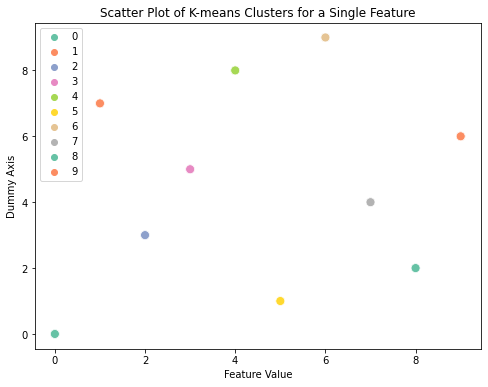

In [106]:
feature = balanced_okcupid[['about_me_cluster_labels']].values.reshape(-1, 1)

#Apply k-means clustering 
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(feature)

#scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=clusters, y=feature.flatten(), hue = clusters, palette = "Set2", s = 80)
plt.xlabel("Feature Value")
plt.ylabel("Dummy Axis")
plt.title("Scatter Plot of K-means Clusters for a Single Feature")

In [95]:
print(clusters.shape)  # Should be (47213,)


(47213,)


In [101]:
from sklearn.decomposition import PCA

# Apply PCA to a single feature
pca = PCA(n_components=1)
pca_feature = pca.fit_transform(feature)  # Reducing the single feature to one principal component

# Scatter plot using PCA-transformed feature
plt.figure(figsize=(8,6))

jitter = np.random.normal(scale=0.1, size=pca_feature.shape)  # Adjust scale as needed
sns.scatterplot(x=clusters, y=pca_feature.flatten(), hue=clusters, palette="Set2", s=80, alpha=0.6)


plt.xlabel("Cluster Label")
plt.ylabel("PCA Transformed Feature Value")
plt.title("Scatter Plot of K-means Clusters with PCA")
plt.show()




ValueError: Per-column arrays must each be 1-dimensional

<Figure size 576x432 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


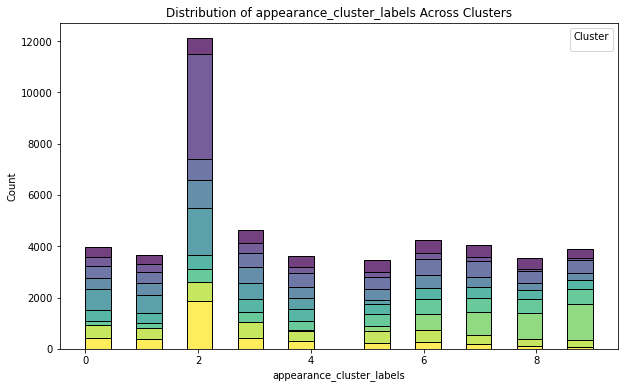

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the feature to visualize
feature_name = 'appearance_cluster_labels'  # Change this to your target feature

plt.figure(figsize=(10, 6))
sns.histplot(data=features, x=feature_name, hue=labels, multiple="stack", palette="viridis", bins=20)
plt.xlabel(feature_name)
plt.ylabel("Count")
plt.title(f"Distribution of {feature_name} Across Clusters")
plt.legend(title="Cluster")
plt.show()


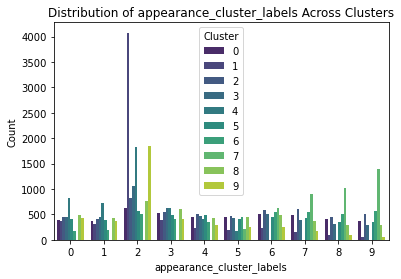

In [64]:
sns.countplot(data=features, x=feature_name, hue=labels, palette="viridis")
plt.xlabel(feature_name)
plt.ylabel("Count")
plt.title(f"Distribution of {feature_name} Across Clusters")
plt.legend(title="Cluster")
plt.show()


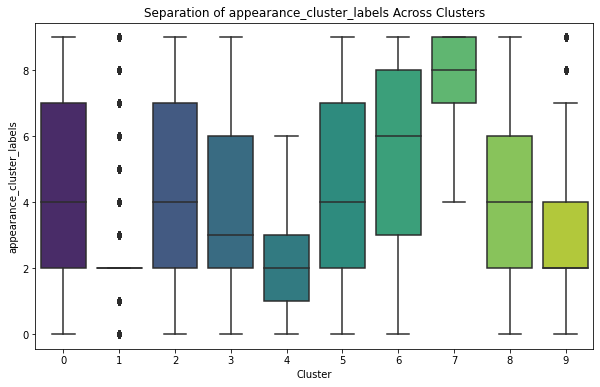

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the feature you want to visualize
feature_name = 'appearance_cluster_labels'  # Change this to your desired feature

plt.figure(figsize=(10, 6))
sns.boxplot(data=features, x=labels, y=feature_name, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel(feature_name)
plt.title(f"Separation of {feature_name} Across Clusters")
plt.show()


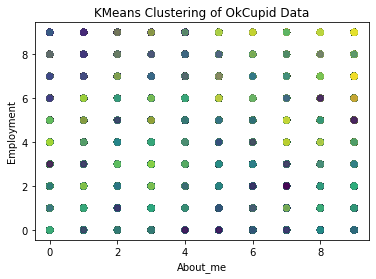

In [66]:
# Create a scatter plot using two features
plt.scatter(features['about_me_cluster_labels'], features['employment_column_labels'], c=labels, cmap='viridis', alpha=0.5)

# Label the axes
plt.xlabel('About_me')
plt.ylabel('Employment')

# Show the plot
plt.title('KMeans Clustering of OkCupid Data')
plt.show()


In [67]:
# Drop a column in place
balanced_okcupid.drop(['about_me', 'employment', 'hobbies', 'appearance', 'fouvourite_music_and_tv', 'likes', 'aspirations', 'weekend', 'fun_fact'], axis=1, inplace=True)

In [68]:
print(balanced_okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47213 entries, 50766 to 25324
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   age                                     47213 non-null  int64   
 1   ideal_date                              47213 non-null  int32   
 2   ethnicity                               47213 non-null  int16   
 3   height                                  47213 non-null  float64 
 4   income                                  47213 non-null  int64   
 5   job                                     47213 non-null  int8    
 6   location                                47213 non-null  int16   
 7   offspring                               47213 non-null  int8    
 8   orientation                             47213 non-null  int8    
 9   pets                                    47213 non-null  int8    
 10  religion                                47

In [137]:
balanced_okcupid.head()

age  ideal_date  ethnicity  height  income  job  location  offspring  \
50766   26        5352        203    68.0      -1   16       137          3   
56457   26        6668        203    64.0      -1    0        37          3   
14046   26       19457        203    68.0   70000    3        13          3   
20786   26       34709        146    64.0      -1   12       137          3   
18177   26       34367        203    67.0      -1   12       104          3   

       orientation  pets  ...  education_rating  about_me_cluster_labels  \
50766            2    13  ...              10.0                        3   
56457            2    12  ...               3.0                        5   
14046            2    14  ...               0.0                        8   
20786            2     2  ...               4.0                        4   
18177            2     2  ...               0.0                        8   

       employment_column_labels  hobbies_cluster_labels  \
50766                         0                       0   
56457                         7                       4   
14046                         1                       1   
20786                         9                       4   
18177                         9                       0   

       appearance_cluster_labels  fouvourite_music_and_tv_cluster_labels  \
50766                          3                                       7   
56457                          6                                       7   
14046                          8                                       8   
20786                          6                                       8   
18177                          1                                       3   

      likes_cluster_labels  aspirations_cluster_labels  \
50766                    6                           7   
56457                    0                           4   
14046                    3                           1   
20786                    9                           6   
18177                    5                           1   

       weekend_cluster_labels  fun_fact_cluster_labels  
50766                       1                        7  
56457                       3                        5  
14046                       1                        4  
20786                       0                        6  
18177                       1                        0  

[5 rows x 36 columns]

In [138]:
fig = plt.figure(figsize=(8, 3))

fig.suptitle('Cluser Center', fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Cluser Center')

<Figure size 576x216 with 0 Axes>

In [139]:
# Scikit-learn sometimes calls centroids “cluster centers”.
# For loop to display each of the cluster_centers:

for i in range(10):
    # Initialize subplots in a grid of 2x5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)

    # Display images
    ax.imshow(kmeans.cluster_centers_[i].reshape((1, 1)), cmap=plt.cm.binary)



In [140]:
cluster_centers = kmeans.cluster_centers_

print(f"{cluster_centers.shape}\n")
print(cluster_centers)


(10, 1)

[[29667.15062647]
 [10415.14993842]
 [22854.35700029]
 [ 4198.79859485]
 [16696.5872515 ]
 [ 7232.42401501]
 [26247.21933898]
 [13603.90062696]
 [ 1350.56930693]
 [19754.81182454]]


# Data transformations for feature analysis

Data Scaling 


In [141]:
from sklearn.preprocessing import StandardScaler


# Select the columns to scale
columns_to_scale = ['age', 'ideal_date', 'ethnicity', 'height', 'income', 'job', 'location', 'offspring', 'orientation', 'pets', 'education_rating', 'about_me_cluster_labels', 'employment_column_labels', 'hobbies_cluster_labels', 'appearance_cluster_labels', 'fouvourite_music_and_tv_cluster_labels', 'likes_cluster_labels', 'aspirations_cluster_labels', 'weekend_cluster_labels', 'fun_fact_cluster_labels']

# Reset the index
okcupid_reset = balanced_okcupid.reset_index(drop=True)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(okcupid_reset[columns_to_scale])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

okcupid_reset.head()

age  ideal_date  ethnicity  height  income  job  location  offspring  \
0   26        5352        203    68.0      -1   16       137          3   
1   26        6668        203    64.0      -1    0        37          3   
2   26       19457        203    68.0   70000    3        13          3   
3   26       34709        146    64.0      -1   12       137          3   
4   26       34367        203    67.0      -1   12       104          3   

   orientation  pets  ...  education_rating  about_me_cluster_labels  \
0            2    13  ...              10.0                        3   
1            2    12  ...               3.0                        5   
2            2    14  ...               0.0                        8   
3            2     2  ...               4.0                        4   
4            2     2  ...               0.0                        8   

   employment_column_labels  hobbies_cluster_labels  \
0                         0                       0   
1                         7                       4   
2                         1                       1   
3                         9                       4   
4                         9                       0   

   appearance_cluster_labels  fouvourite_music_and_tv_cluster_labels  \
0                          3                                       7   
1                          6                                       7   
2                          8                                       8   
3                          6                                       8   
4                          1                                       3   

  likes_cluster_labels  aspirations_cluster_labels  weekend_cluster_labels  \
0                    6                           7                       1   
1                    0                           4                       3   
2                    3                           1                       1   
3                    9                           6                       0   
4                    5                           1                       1   

   fun_fact_cluster_labels  
0                        7  
1                        5  
2                        4  
3                        6  
4                        0  

[5 rows x 36 columns]

# # Further EDA 

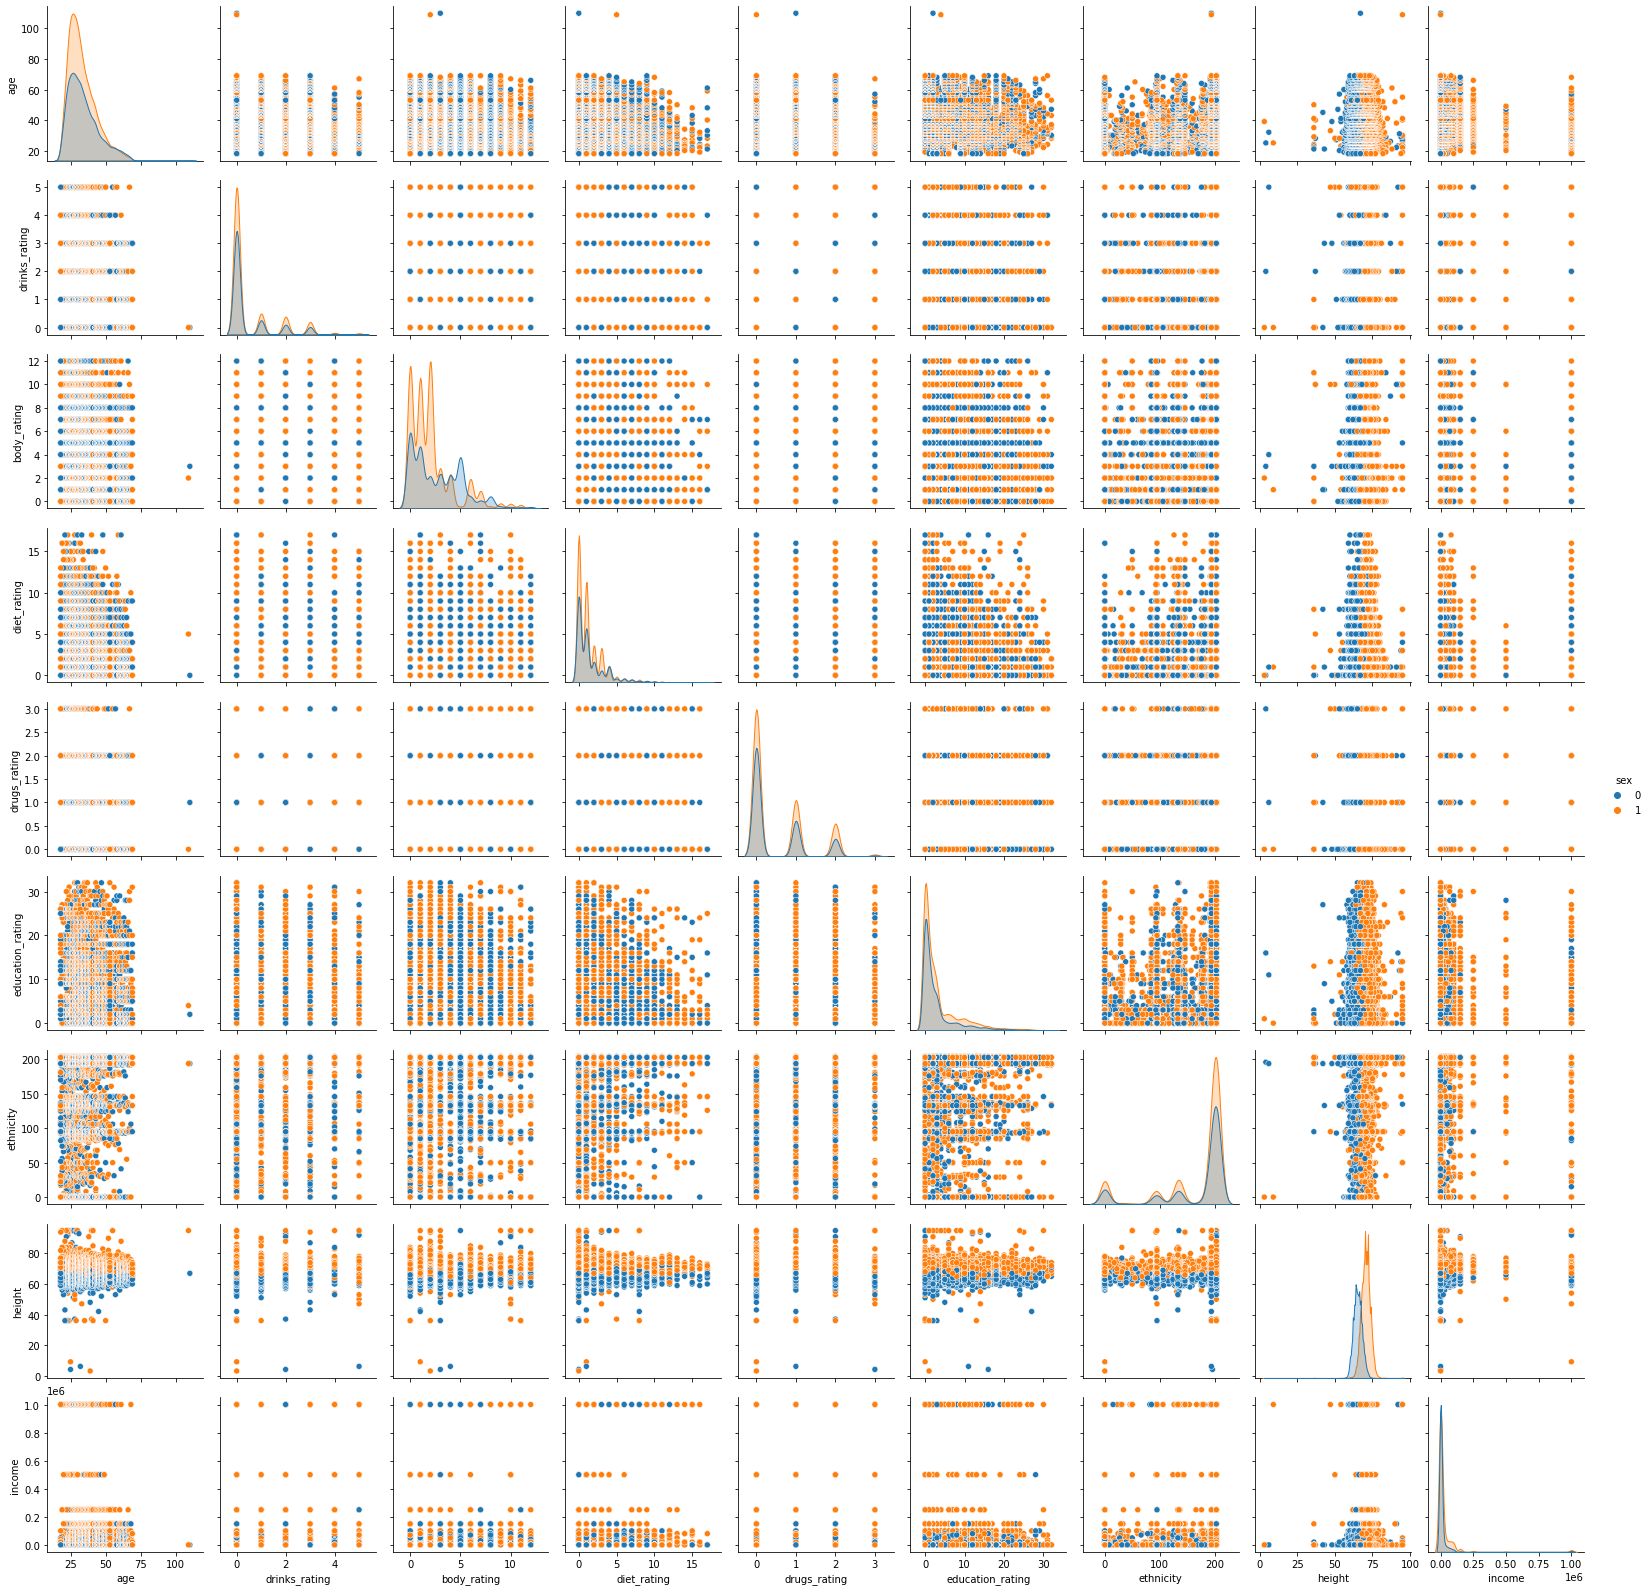

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns to include in the pairplot
columns_to_display = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']

# Create the pairplot with the specified columns
sns.pairplot(okcupid_reset, vars=columns_to_display, hue='sex')
plt.show()


In [171]:
# Specify the columns to include in the pairplot
columns_to_display = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']

correlation_matrix = balanced_okcupid[columns_to_display].corr() # calculate the correlation matrix

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')    # create the heat maps. annot=True adds the correlation 
                                                                # values on the heatmap.
                                                                # cmap='coolwarm' sets the color map for the heatmap.
plt.show()




KeyError: "['drinks_rating', 'body_rating', 'diet_rating', 'drugs_rating', 'education_rating'] not in index"

In [144]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

okcupid_reset.head(10)

age  ideal_date  ethnicity  height  income  job  location  offspring  \
0   26        5352        203    68.0      -1   16       137          3   
1   26        6668        203    64.0      -1    0        37          3   
2   26       19457        203    68.0   70000    3        13          3   
3   26       34709        146    64.0      -1   12       137          3   
4   26       34367        203    67.0      -1   12       104          3   
5   26       19651        203    68.0      -1   11       124          3   
6   26       18498          0    68.0      -1    7       137          3   
7   26       26205          0    72.0      -1   11        37          3   
8   26       11842        203    66.0      -1    0       171          3   
9   26       34367        203    76.0      -1   18        13          3   

   orientation  pets  religion  sex  sign  smokes  speaks  status age_group  \
0            2    13        44    1    46       3       1       3     25-34   
1            2    12        19    0    26       3       0       3     25-34   
2            2    14         1    1    22       0    2370       3     25-34   
3            2     2        20    0    28       0       0       3     25-34   
4            2     2        16    0    18       0    1681       3     25-34   
5            2    14         9    1    12       0    3756       3     25-34   
6            2    14         9    1    35       0     346       3     25-34   
7            2     9         9    1    43       0     405       3     25-34   
8            2     9        36    0    22       0    3402       3     25-34   
9            2    11        24    1     8       2    6006       3     25-34   

   month  day  year  hour  minute  body_rating  diet_rating  drinks_rating  \
0      0    6     6     0       6          2.0          3.0            0.0   
1      0    9     9     0       9          3.0          0.0            0.0   
2      0    6     6     0       6         10.0          0.0            0.0   
3      0    6     6     0       6          0.0          2.0            0.0   
4      0    5     5     0       5          2.0          0.0            1.0   
5      0    6     6     0       6          0.0          1.0            0.0   
6      0    7     7     0       7          0.0          1.0            0.0   
7      0    6     6     0       6          1.0          0.0            0.0   
8      0    6     6     0       6          2.0          1.0            0.0   
9      0    6     6     0       6         11.0          1.0            0.0   

   drugs_rating  education_rating  about_me_cluster_labels  \
0           2.0              10.0                        3   
1           0.0               3.0                        5   
2           0.0               0.0                        8   
3           0.0               4.0                        4   
4           0.0               0.0                        8   
5           0.0               0.0                        0   
6           0.0               0.0                        2   
7           0.0               0.0                        5   
8           1.0               0.0                        3   
9           2.0               1.0                        3   

   employment_column_labels  hobbies_cluster_labels  \
0                         0                       0   
1                         7                       4   
2                         1                       1   
3                         9                       4   
4                         9                       0   
5                         6                       6   
6                         3                       3   
7                         0                       3   
8                         4                       2   
9                         6                       1   

   appearance_cluster_labels  fouvourite_music_and_tv_cluster_labels  \
0                          3                                       7   
1              

In [170]:
print(okcupid_reset.columns)
#balanced_okcupid['age'].value_counts()
okcupid_reset['age'].value_counts()

Index(['age', 'ideal_date', 'ethnicity', 'height', 'income', 'job', 'location',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status', 'month', 'day', 'year', 'hour', 'minute',
       'body_rating', 'diet_rating', 'drinks_rating', 'drugs_rating',
       'education_rating', 'about_me_cluster_labels',
       'employment_column_labels', 'hobbies_cluster_labels',
       'appearance_cluster_labels', 'fouvourite_music_and_tv_cluster_labels',
       'likes_cluster_labels', 'aspirations_cluster_labels',
       'weekend_cluster_labels', 'fun_fact_cluster_labels'],
      dtype='object')


26     2316
27     2303
28     2282
25     2261
29     2185
24     2163
30     2140
31     1986
23     1930
32     1930
33     1777
22     1605
34     1585
35     1496
36     1391
37     1281
38     1217
21     1189
39     1112
42     1033
40      998
41      947
20      923
43      837
44      700
45      640
19      609
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64

In [146]:
okcupid_reset.drop(['age_group'], axis=1, inplace=True)

'''
In the context of the drop() function in pandas:

inplace=True: This modifies the DataFrame in place, meaning the changes are applied directly to the original DataFrame without needing to assign it back to a variable. If inplace=False (default), the function returns a new DataFrame with the changes, and the original DataFrame remains unchanged.

axis=1: This specifies that the operation should be performed on columns. In pandas, axis=0 refers to rows, and axis=1 refers to columns. So, axis=1 is used when you want to drop columns.
'''

'\nIn the context of the drop() function in pandas:\n\ninplace=True: This modifies the DataFrame in place, meaning the changes are applied directly to the original DataFrame without needing to assign it back to a variable. If inplace=False (default), the function returns a new DataFrame with the changes, and the original DataFrame remains unchanged.\n\naxis=1: This specifies that the operation should be performed on columns. In pandas, axis=0 refers to rows, and axis=1 refers to columns. So, axis=1 is used when you want to drop columns.\n'

#  Principle Component Analysis 

In [148]:
from sklearn.decomposition import PCA
import pandas as pd



#Prepare your data: Ensure your data is in a numerical format and standardized (mean = 0, variance = 1) if necessary.

pca = PCA(n_components=2)  # Initialize PCA: Specify the number of components you want to keep.

principal_components = pca.fit_transform(okcupid_reset) # Fit and transform the data:

pca_df = pd.DataFrame(data = principal_components, columns=['PC1', 'PC2']) 

print(pca.explained_variance_ratio_) # Analyze the results: Check the explained variance ratio to understand how much variance each component captures.

pca_df.head()

[0.98562143 0.01390603]


PC1           PC2
0 -19944.915784 -16063.762698
1 -19947.403725 -14747.802849
2  50029.973666  -1845.566921
3 -20000.406790  13292.278825
4 -19999.278400  12936.938909

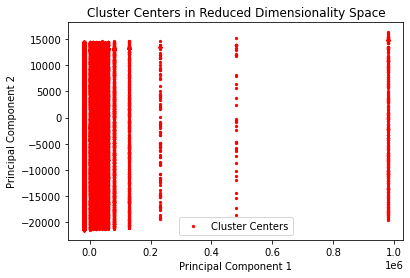

In [149]:

# Plot the cluster centers
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='red', marker='.', s=20, label='Cluster Centers')

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.legend()

# Show the plot
plt.title('Cluster Centers in Reduced Dimensionality Space')
plt.show()


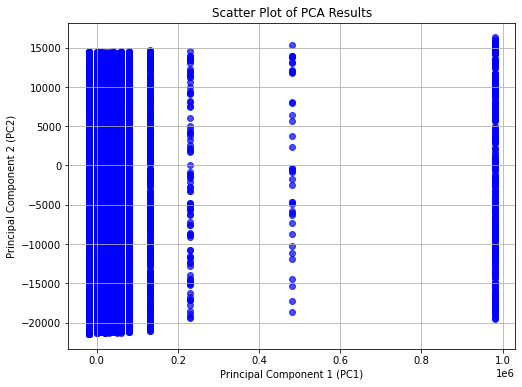

In [150]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c='blue')  # Adjust 'alpha' and 'c' to customize the plot
plt.title('Scatter Plot of PCA Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()


<Axes:xlabel='PC1', ylabel='PC2'>

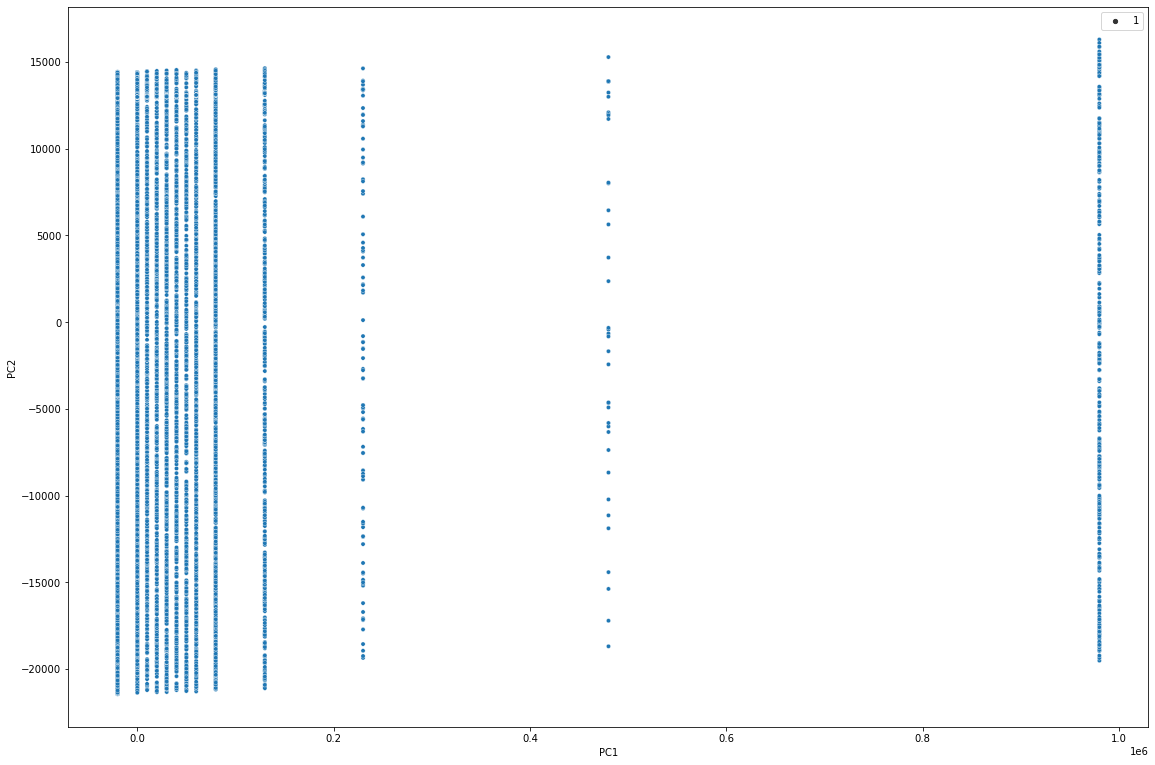

In [151]:
ax = plt.axes((0,0, 2.5, 2.5))

sns.scatterplot(data=kmeans, x = pca_df['PC1'], y = pca_df['PC2'], size = 1, ax = ax)

<Axes:xlabel='PC1', ylabel='PC2'>

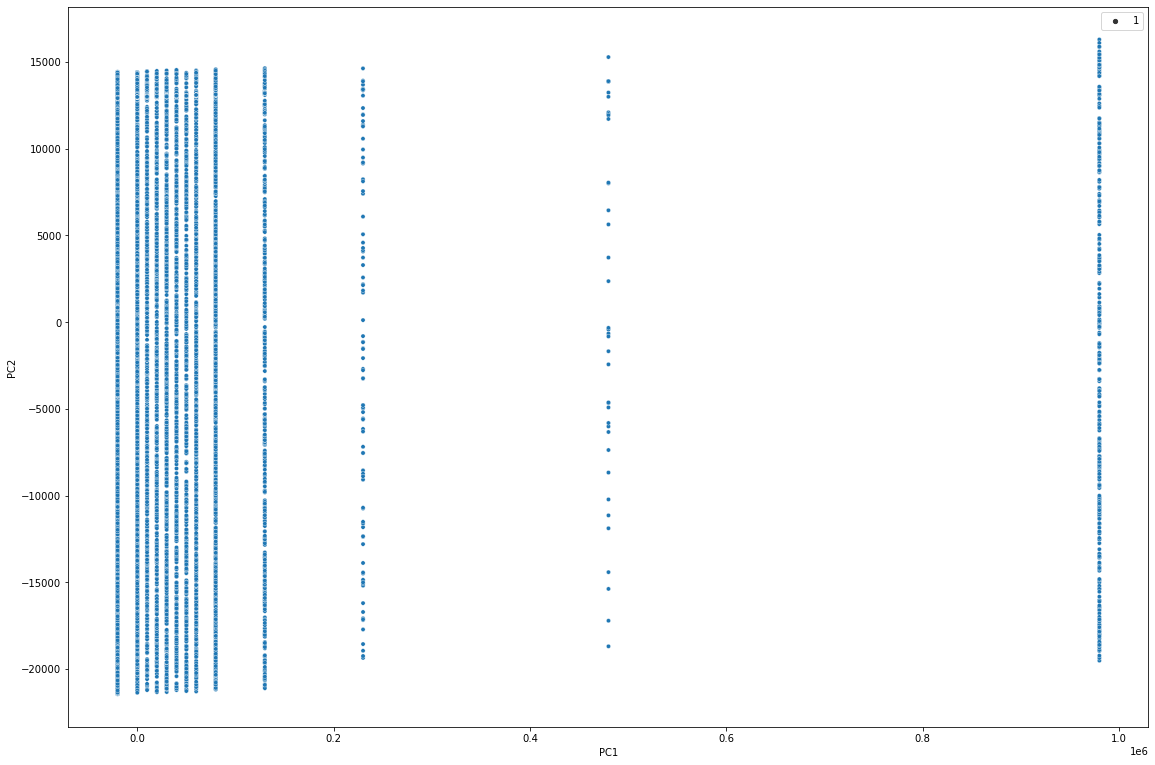

In [152]:
ax = plt.axes((0,0, 2.5, 2.5))

sns.scatterplot(data=kmeans, x = pca_df['PC1'], y = pca_df['PC2'], size = 1, ax = ax)

# Data Visualisation

C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\distr

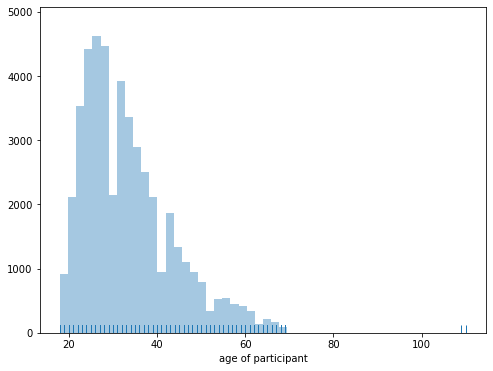

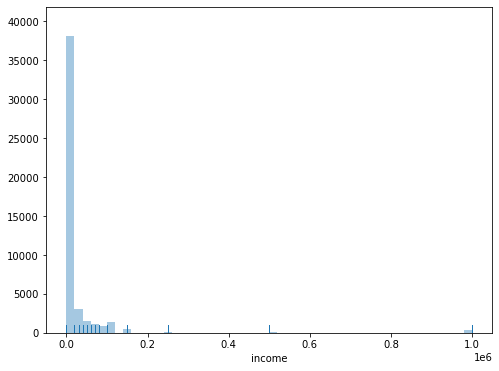

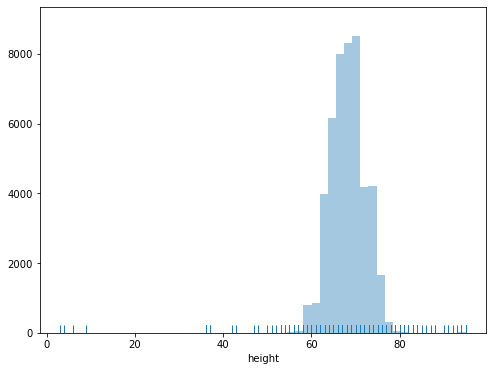

In [172]:
# Numerical colums

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.age, rug = True, kde=False)
plt.xlabel("age of participant");

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.income, rug = True, kde=False)
plt.xlabel("income");

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.height, rug = True, kde=False)
plt.xlabel("height");

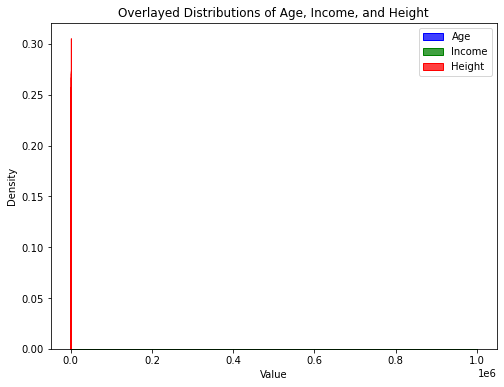

In [173]:
plt.figure(figsize=(8, 6))

# Overlayed distribution plots
sns.histplot(okcupid_reset.age, color='blue', label='Age', kde=False, element='step', stat='density')
sns.histplot(okcupid_reset.income, color='green', label='Income', kde=False, element='step', stat='density')
sns.histplot(okcupid_reset.height, color='red', label='Height', kde=False, element='step', stat='density')

plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.title("Overlayed Distributions of Age, Income, and Height")
plt.show()


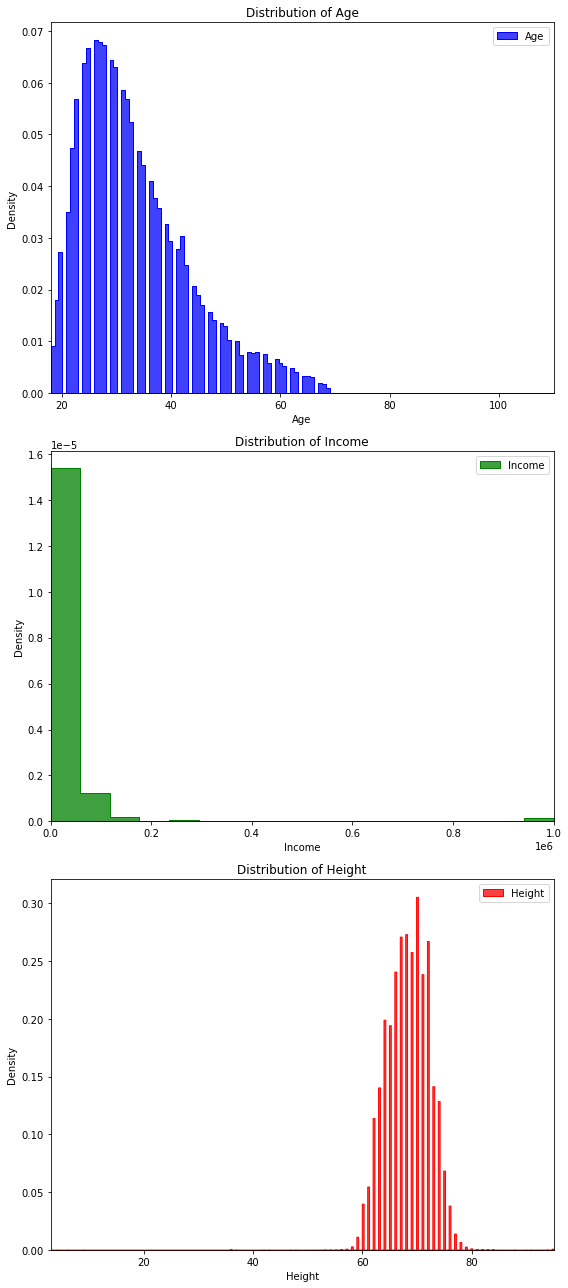

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Plot for Age
sns.histplot(okcupid_reset.age, color='blue', label='Age', kde=False, element='step', stat='density', ax=axes[0])
axes[0].set_xlim(min(okcupid_reset.age), max(okcupid_reset.age))  # Adjust the x-axis range for age
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")
axes[0].legend()

# Plot for Income
sns.histplot(okcupid_reset.income, color='green', label='Income', kde=False, element='step', stat='density', ax=axes[1])
axes[1].set_xlim(min(okcupid_reset.income), max(okcupid_reset.income))  # Adjust the x-axis range for income
axes[1].set_title("Distribution of Income")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("Density")
axes[1].legend()

# Plot for Height
sns.histplot(okcupid_reset.height, color='red', label='Height', kde=False, element='step', stat='density', ax=axes[2])
axes[2].set_xlim(min(okcupid_reset.height), max(okcupid_reset.height))  # Adjust the x-axis range for height
axes[2].set_title("Distribution of Height")
axes[2].set_xlabel("Height")
axes[2].set_ylabel("Density")
axes[2].legend()

plt.tight_layout()
plt.show()


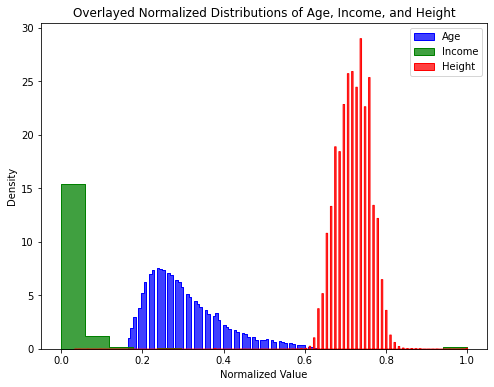

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize each variable so their densities are comparable
normalized_age = okcupid_reset.age / max(okcupid_reset.age)
normalized_income = okcupid_reset.income / max(okcupid_reset.income)
normalized_height = okcupid_reset.height / max(okcupid_reset.height)

plt.figure(figsize=(8, 6))

# Overlayed normalized distribution plots
sns.histplot(normalized_age, color='blue', label='Age', kde=False, element='step', stat='density')
sns.histplot(normalized_income, color='green', label='Income', kde=False, element='step', stat='density')
sns.histplot(normalized_height, color='red', label='Height', kde=False, element='step', stat='density')

plt.xlabel("Normalized Value")
plt.ylabel("Density")
plt.legend()
plt.title("Overlayed Normalized Distributions of Age, Income, and Height")
plt.show()


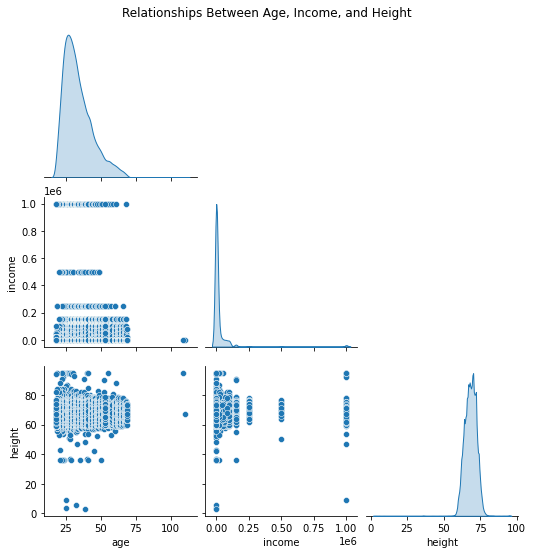

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to show relationships between age, income, and height
sns.pairplot(okcupid_reset, vars=['age', 'income', 'height'], diag_kind='kde', corner=True)

plt.suptitle("Relationships Between Age, Income, and Height", y=1.02)
plt.show()


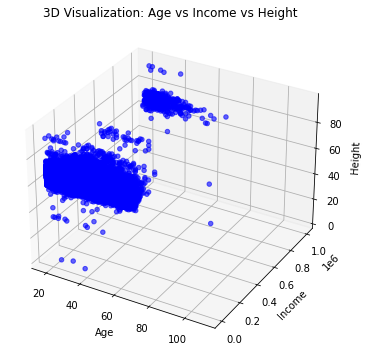

In [177]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(okcupid_reset.age, okcupid_reset.income, okcupid_reset.height, alpha=0.6, c='blue')

ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Height")
ax.set_title("3D Visualization: Age vs Income vs Height")
plt.show()


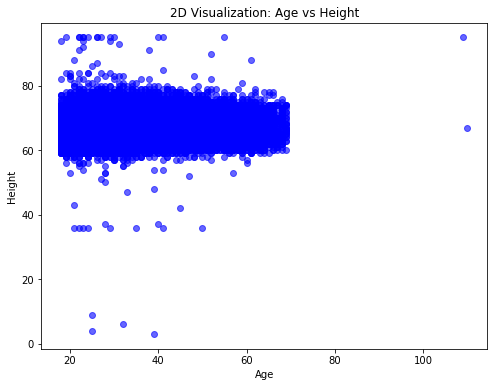

In [178]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Scatter plot
ax.scatter(okcupid_reset.age, okcupid_reset.height, alpha=0.6, c='blue')

ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_title("2D Visualization: Age vs Height")
plt.show()


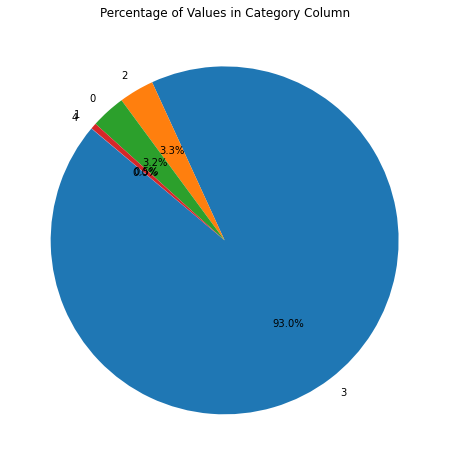

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each value
value_counts = okcupid_reset['status'].value_counts()

# Calculate percentages
percentages = (value_counts / len(okcupid_reset)) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Values in Category Column')
plt.show()


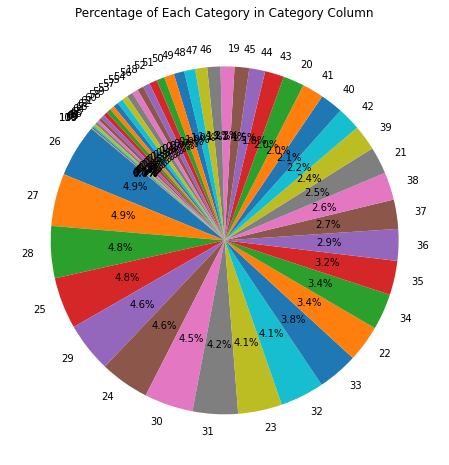

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each value
value_counts = okcupid_reset['age'].value_counts()

# Calculate percentages
percentages = (value_counts / value_counts.sum()) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Category in Category Column')
plt.show()


In [181]:
okcupid_reset.sex.value_counts(normalize=True)

1    0.593184
0    0.406816
Name: sex, dtype: float64

# Usful relationships

  age                                    
 1   ideal_date                              
 2   ethnicity                               
 3   height                                
 4   income                                  
 5   job                                      
 6   location                                
 7   offspring                                
 8   orientation                              
 9   pets                                     
 10  religion                                 
 11  sex                                      
 12  sign                                     
 13  smokes                                   
 14  speaks                                  
 15  status                                   
 16  month                                    
 17  day                                      
 18  year                                     
 19  hour                                     
 20  minute                                  
 21  body_rating                           
 22  diet_rating                      
 23  drinks_rating                     
 24  drugs_rating                       
 25  education_rating                        
 26  about_me_cluster_labels                   
 27  employment_column_labels                  
 28  hobbies_cluster_labels                    
 29  appearance_cluster_labels                 
 30  fouvourite_music_and_tv_cluster_labels    
 31  likes_cluster_labels                    
 32  aspirations_cluster_labels                
 33  weekend_cluster_labels                   -    
 34  fun_fact_cluster_labels                 

# The Machine Learning Model 

'''
There are three possible analysis we can perform: 
    
    - Regression for age vs heigh 
    - Logistic Regress for sex
    - A classification model for status
'''

## Linear Regression Model 

In [182]:
from sklearn import linear_model

okcupid[['age', 'height']].head()



age  height
50766   26    68.0
56457   26    64.0
14046   26    68.0
20786   26    64.0
18177   26    67.0

In [183]:
 average_height= okcupid.groupby('sex').height.mean().reset_index()
print(average_height)

  sex     height
0   f  65.099188
1   m  70.438422


In [184]:
X = okcupid["age"]

X = X.values.reshape(-1, 1)


In [185]:
Y = okcupid["height"]

Y = Y.values.reshape(-1, 1)


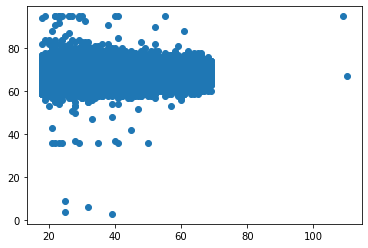

In [186]:
plt.scatter(X, Y)


In [187]:
# Create and Fit a Linear Regression Model

okcupid_linear_regression_model = linear_model.LinearRegression() #The LinearRegression class is from the linear_model module.

okcupid_linear_regression_model.fit(X,Y)

# Print the slope (coefficient)
print(okcupid_linear_regression_model.coef_[0])


ValueError: Input y contains NaN.

In [188]:
# Assuming X_new is the new data you want to predict on
# X_new should be a 2D array, similar to X used in fitting

# Example: Predicting on the same data
y_predict = okcupid_linear_regression_model.predict(X)

# Print predictions
print(y_predict)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [189]:
plt.plot(X, y_predict)
plt.show()

NameError: name 'y_predict' is not defined

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

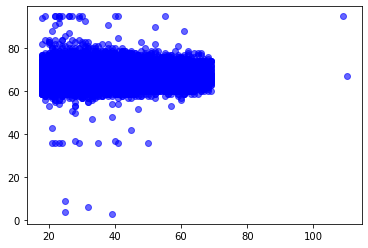

In [190]:
# Scatter plot of the original data
plt.scatter(X, Y, alpha=0.6, c='blue', label='Data')

# Line of best fit
y_predict = okcupid_linear_regression_model.predict(X)
plt.plot(X, y_predict, color='red', label='Line of Best Fit')

# Add labels and title
plt.xlabel('X-axis Label')  # Replace with actual label
plt.ylabel('Y-axis Label')  # Replace with actual label
plt.title('Scatter Plot with Line of Best Fit')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for future years
start_age = 100  # Example start year
end_age = 110    # Example end year

# Create and reshape X_future
X_future = np.array(range(start_age, end_age)).reshape(-1, 1)

# Predict future heights
future_predict = okcupid_linear_regression_model.predict(X_future)

# Plot future predictions
plt.plot(X_future, future_predict, color='green', label='Future Predictions')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Predicted Height')
plt.title('Future Height Predictions')

# Show the plot
plt.show()

######





NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [192]:
import numpy as np

# Given age for which you want to predict the height
age_to_predict = 100  

# Prepare the age data for prediction
age_array = np.array([[age_to_predict]])  # Reshape to 2D array

# Predict the height for the given age
predicted_height = okcupid_linear_regression_model.predict(age_array)

# Print the predicted height
print(f"Predicted height for age {age_to_predict}: {predicted_height[0]}")


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [193]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X and Y are your data
y_pred = okcupid_linear_regression_model.predict(X)

# Calculate MAE
mae = mean_absolute_error(Y, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate MSE
mse = mean_squared_error(Y, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(Y, y_pred)
print(f"R-squared: {r2}") # an r^2 result close to zero show the result do not fit the model very well
                          # This may be because the data is bias and does no accurate reflect the true gradient

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Multiple Linear Regression

Multiple Linear Regression can be used here as there are two independent numerical variable, age and height, with incomee being the possible dependent variable. 


In [194]:
# after removing outliers 

# To remove extreme values from a given column that do not contribute to the general pattern of the data, 
# you can use statistical methods to identify and filter out these outliers. Here are some common approaches:

# Z-Score Method: Calculate the z-score for each data point and remove those with a z-score above a certain threshold (commonly 3).

# Interquartile Range (IQR) Method: Calculate the IQR and remove data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

# Percentile Method: Remove data points below a certain percentile (e.g., 1st percentile) or above a certain percentile (e.g., 
# 99th percentile).


import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'height' and 'age' are the columns to filter
# Calculate IQR for 'height'
Q1_height = okcupid['height'].quantile(0.25)
Q3_height = okcupid['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

# Calculate IQR for 'age'
Q1_age = okcupid['age'].quantile(0.25)
Q3_age = okcupid['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Filter out outliers for 'height' and 'age'
df_filtered = okcupid[
    (okcupid['height'] >= (Q1_height - 1.5 * IQR_height)) & 
    (okcupid['height'] <= (Q3_height + 1.5 * IQR_height)) &
    (okcupid['age'] >= (Q1_age - 1.5 * IQR_age)) & 
    (okcupid['age'] <= (Q3_age + 1.5 * IQR_age))
]

# Create x and y from the filtered DataFrame
x = df_filtered[['height', 'age']]
y = df_filtered[['income']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)




(36592, 2)
(9149, 2)
(36592, 1)
(9149, 1)


In [195]:
'''

# Spliting the dataset
from sklearn.model_selection import train_test_split

# Create a DataFrame x that selects the following columns from the main df DataFrame:
x = okcupid[['height', 'age']]

y = okcupid[['income']]

# Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set and generate:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

'''

"\n\n# Spliting the dataset\nfrom sklearn.model_selection import train_test_split\n\n# Create a DataFrame x that selects the following columns from the main df DataFrame:\nx = okcupid[['height', 'age']]\n\ny = okcupid[['income']]\n\n# Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set and generate:\nx_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)\n\nprint(x_train.shape)\nprint(x_test.shape)\n\nprint(y_train.shape)\nprint(y_test.shape)\n\n"

In [196]:
# Now we have the training set and the test set, let’s use scikit-learn to build the linear regression model!

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train, y_train) 
# finds the coefficients and the intercept value

y_predicted = mlr.predict(x_test)
# takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values. 



In [197]:
# Print the first predicted rent value
print("Predicted income: $%.2f" % y_predicted[0])




Predicted income: $19559.49


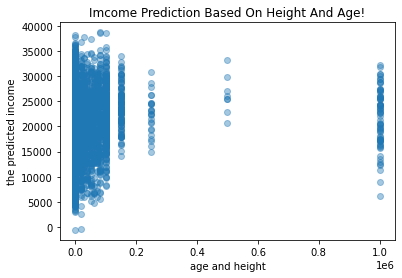

In [198]:
# a 2D scatterplot to see how the independent affect the dependent variable using pyplot module: 

# Create a scatter plot
plt.scatter(y_test, y_predicted, alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("age and height")
plt.ylabel("the predicted income")

# Create a title
plt.title("Imcome Prediction Based On Height And Age!")

# Show the plot
plt.show()



In [199]:
# Even thought two independent variable have been used it is possible to use any number
# The .fit() method gives the model two variables that are useful to us:

#      .coef_, which contains the coefficients
#      .intercept_, which contains the intercept
#       After performing multiple linear regression, you can print the coefficients using .coef_.

#       Coefficients are most helpful in determining which independent variable carries more weight. 
#       For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, 
#       with the former impacting prices negatively and latter positively

print(mlr.coef_)

print(mlr.intercept_)


[[1604.44311322   56.3878606 ]]
[-91459.83324741]


In [200]:
# Assessing the model accracy 
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))


Train score:
0.004177962681423231
Test score:
0.004761491718064503


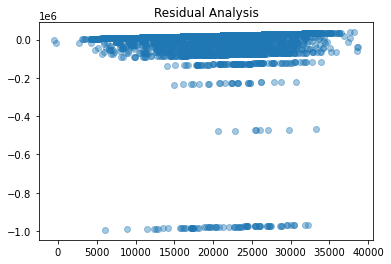

In [201]:
# graph a scatter plot of residuals vs. predicted_y values

residuals = y_predicted - y_test

plt.scatter(y_predicted, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()


# Logistic Regression 

In [202]:
 # The sex column can be used as a target variable for binary classification. 

In [203]:
okcupid['sex'].info()

<class 'pandas.core.series.Series'>
Int64Index: 47213 entries, 50766 to 25324
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
47213 non-null  object
dtypes: object(1)
memory usage: 737.7+ KB


In [204]:
males = okcupid['sex'].sum()
print("there are:", males, "males")
print("and there are", 59946 - males, "females")

there are: mfmffmmmfmmmmfmfmmmmffffmfmmfmmmmmffmfmmmfmffmmmfmfmfmmfffmffmmmmmmmffmmfmmmmfmfmmffmfmmmmffmffmmmmmmmmmmmmmmmfmmmmfmfmmmffmmmfmfmmmffffmmmmmfmmffmmmfmmfmffmffmmmmmmfffmmmfmmfmmffmffmfmmfffffmfmfmmmmmmmfmffmmffffffmmmmfmmfmmmmmmffmfmmmmmmffmffmmmfmmfmmmmmfmmmfmfmfmmfffmmfmfmmfffmmmffmfmfmffmmfffffmmfffmmfmfmmfmmfffmmmmfmmmffmfmfmmffffmmffmmffffmfmmfmmmfmfmffmfffmmmmmmmmfmmmfffmmfmfmfmffmfmfmfmfmfmmffmmmfmffmmmmmmfmmffmmfmmmmmmmmffmfmmfffffffmmmmfmfmmfmfmmfmmfmmfmmfmmmmmmmmmfmmmfmmfmmmffmfmmmmfmmmmmmmmfmmmfmffmmmfmmffmmfmmfmfffmfmffmmmmfmfmmfffmmfmmfmmmmmmfffmmfmfmmfmmffffmmmmfmfmmmfmfmmmmmmfmmfmfmmfmmmmmmffmfmmmfmfmmfmmfmmfmffmfmmmfmmffmfmmmffmmmmmmmmffmmmmmmmmffmmmmmmmmfmmmmffmmmmmmfmmmfmmmfffmfmmmmfmfmmffmmfffmmfmfmmffmmmfmfmmmmmfmfmffmmffmmmmmfmmfmmmmfmmfmmmmmmmmmmfmfmfmmfmmfmmmmfmmmfmmmmmffmmmfmmmfmfmmmfmfmmmmmfmmfmfmfmmmfmmffmmfmfmfmmmfmmmmmmmfmffmmfmfmmmmmffmfmfmfffmmmmmmmffmmfmfffmmmmmmfmmmmfffmmfmfmmfmmmmmmmmmfmmmffffffffmffmmmmmmmmmmfmfmmmfmfmmfmfmfmmfmmmffmmffmfmfm

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [205]:
okcupid['sex'].describe()

'''
The summary statistics for the `sex` column provide insights into the distribution of the data in this column:

1. **Count (59946)**: There are 59,946 entries in the `sex` column.

2. **Mean (0.597688)**: The mean value of approximately 0.598 suggests that about 59.8% of the entries are 1. 
    This likely indicates a binary encoding where one sex is represented by 1 and the other by 0.

3. **Standard Deviation (0.490368)**: This measures the variability in the `sex` values. 
    A standard deviation close to 0.5 is typical for binary data.

4. **Minimum (0)**: The smallest value is 0, representing one category of sex.

5. **25th Percentile (0)**: 25% of the entries are in the category represented by 0.

6. **50th Percentile (1)**: The median value is 1, indicating that at least half of the entries are in the category represented by 1.

7. **75th Percentile (1)**: 75% of the entries are in the category represented by 1.

8. **Maximum (1)**: The largest value is 1, representing the other category of sex.

These statistics suggest that the dataset is slightly imbalanced, with more entries in the category represented by 1.

'''

'\nThe summary statistics for the `sex` column provide insights into the distribution of the data in this column:\n\n1. **Count (59946)**: There are 59,946 entries in the `sex` column.\n\n2. **Mean (0.597688)**: The mean value of approximately 0.598 suggests that about 59.8% of the entries are 1. \n    This likely indicates a binary encoding where one sex is represented by 1 and the other by 0.\n\n3. **Standard Deviation (0.490368)**: This measures the variability in the `sex` values. \n    A standard deviation close to 0.5 is typical for binary data.\n\n4. **Minimum (0)**: The smallest value is 0, representing one category of sex.\n\n5. **25th Percentile (0)**: 25% of the entries are in the category represented by 0.\n\n6. **50th Percentile (1)**: The median value is 1, indicating that at least half of the entries are in the category represented by 1.\n\n7. **75th Percentile (1)**: 75% of the entries are in the category represented by 1.\n\n8. **Maximum (1)**: The largest value is 1, 

In [206]:
# creating new colums to filter data ( for information purposes only)

# Create isPayment field
#transactions['isPayment'] = transactions['type'].apply(lambda x: 1 if x in ['PAYMENT', 'DEBIT'] else 0)

# Create isMovement field
#transactions['isMovement'] = transactions['type'].apply(lambda x: 1 if x in ['CASH_OUT', 'TRANSFER'] else 0)

# Create accountDiff field
#transactions['accountDiff'] = abs(transactions['oldbalanceOrg'] - transactions['oldbalanceDest'])

#- transactions['type'] create a new column
#- lambda creates the new column
#- it checks if the x is assigned a valuse of 1 corresponding to cash out or a elase a 0 corresponing to transfer.

In [207]:
# Create features and label variables

features = okcupid[['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']]

label = okcupid['sex']

KeyError: "['drinks_rating', 'body_rating', 'diet_rating', 'drugs_rating', 'education_rating'] not in index"

In [208]:
# Split the data into training and test sets using sklearn‘s train_test_split() method. 
# We’ll use the training set to train the model and the test set to evaluate the model. Use a test_size value of 0.3.

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=6)

NameError: name 'label' is not defined

In [209]:
# Normalize the features variables
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [210]:
# Fit the model to the training data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [211]:
# Score the model on the training data
train_score = model.score(x_train_scaled, y_train)
print(f"Training accuracy: {train_score}")

# 85% is quite good but adding or removing feature may improve this

Training accuracy: 0.8067610406646262


In [212]:
# Print the model coefficients
print("Model coefficients:", model.coef_)

'''
In the context of a logistic regression model, the coefficients represent the relationship between each feature and the log-odds of the outcome. Here's what they mean:

1. **Magnitude**: The size of the coefficient indicates the strength of the relationship. A larger absolute value suggests a stronger influence on the outcome.

2. **Sign**: 
   - A positive coefficient means that as the feature value increases, the log-odds of the outcome (e.g., fraud) also increase, making the event more likely.
   - A negative coefficient means that as the feature value increases, the log-odds of the outcome decrease, making the event less likely.

3. **Interpretation**: 
   - For a feature with a positive coefficient, an increase in that feature's value is associated with an increase in the likelihood of the outcome.
   - For a feature with a negative coefficient, an increase in that feature's value is associated with a decrease in the likelihood of the outcome.

In logistic regression, the coefficients are used to calculate the probability of the outcome using the logistic function. They help in understanding which features are most influential in predicting the outcome.

The model coefficients from a logistic regression model indicate the influence of each feature on the log-odds of the outcome. Here's how to interpret them:

1. **Negative Coefficients**: 
   - Features with negative coefficients (e.g., `-0.04780077`, `-0.37817339`, `-0.09492182`, `-0.5075958`) suggest that as these feature values increase, the likelihood of the outcome (e.g., fraud) decreases.

2. **Positive Coefficients**: 
   - Features with positive coefficients (e.g., `0.08927373`, `0.07409869`, `0.12983127`, `2.70766712`, `0.21612464`) suggest that as these feature values increase, the likelihood of the outcome increases.

3. **Magnitude**:
   - The magnitude of the coefficient indicates the strength of the relationship. For example, `2.70766712` has a strong positive influence, suggesting this feature significantly increases the likelihood of the outcome.

Each coefficient corresponds to a feature in the model. To fully understand the impact, you need to know which feature each coefficient is associated with. The feature with the largest absolute coefficient has the most significant impact on the prediction.
'''

Model coefficients: [[-0.35764635 -0.11436618]
 [-0.23144148 -1.12104174]
 [-0.22369895 -0.24112436]
 [-0.22641407 -0.12865725]
 [-0.20780149  0.1336374 ]
 [-0.10517592  0.10981495]
 [-0.02017405  0.23476701]
 [-0.04401333  0.27242462]
 [ 0.10898951  0.37569056]
 [ 0.23362988  0.45438485]
 [ 0.66194661  0.47932721]
 [ 0.42188262  0.09800046]
 [-0.01008298 -0.55285752]]


"\nIn the context of a logistic regression model, the coefficients represent the relationship between each feature and the log-odds of the outcome. Here's what they mean:\n\n1. **Magnitude**: The size of the coefficient indicates the strength of the relationship. A larger absolute value suggests a stronger influence on the outcome.\n\n2. **Sign**: \n   - A positive coefficient means that as the feature value increases, the log-odds of the outcome (e.g., fraud) also increase, making the event more likely.\n   - A negative coefficient means that as the feature value increases, the log-odds of the outcome decrease, making the event less likely.\n\n3. **Interpretation**: \n   - For a feature with a positive coefficient, an increase in that feature's value is associated with an increase in the likelihood of the outcome.\n   - For a feature with a negative coefficient, an increase in that feature's value is associated with a decrease in the likelihood of the outcome.\n\nIn logistic regressio

# Logistic Regression 2

In [213]:
df['sex'].value_counts() # shows the distribution of sex classes.

m    111423
f     89673
Name: sex, dtype: int64

In [214]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

feature_cols = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']

X = pd.get_dummies(okcupid[feature_cols], drop_first=True)

#print(X)

KeyError: "['drinks_rating', 'body_rating', 'diet_rating', 'drugs_rating', 'education_rating'] not in index"

In [215]:
# Create a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 720x576 with 0 Axes>

In [216]:
#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k

#y = okcupid['sex']     #.apply(lambda x: 1 if x == '>50K' else 0)

y = okcupid['sex'].astype(int)

ValueError: invalid literal for int() with base 10: 'm'

In [ ]:
# 5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Fit LR model with sklearn on train set, and predicting on the test set

log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [217]:
# Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:', log_reg.intercept_)
print('Model Parameters, Coeff:', log_reg.coef_)

NameError: name 'log_reg' is not defined

In [218]:
# Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.

print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
print('Accuracy Score on test set:')
print(accuracy_score(y_test, y_pred))


Confusion Matrix on test set:


NameError: name 'y_pred' is not defined

In [219]:
# Create a DataFrame of the model coefficients and variable names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort the coefficients by their absolute values
coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values().index)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [220]:
# Calculate the predicted probabilities
y_pred_prob = log_reg.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate and print the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.2f}')


NameError: name 'log_reg' is not defined

In [221]:
predictors = features.columns
coefficients = log_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()


NameError: name 'log_reg' is not defined

In [222]:
'''
You’re now ready to evaluate this classifier! In the case of linear regression, we evaluated our models using mean-squared-error. 
For classifiers, it is important that the classifier not only has high accuracy, but also high precision and recall, i.e., a low false
positive and false negative rate.

A metric known as f1 score, which is the weighted mean of precision and recall, captures the performance of a classifier holistically.
It takes values between 0 and 1 and the closer it is to 1, the better the classifier. Use f1_score() to calculate the f1 score for the
training and test data.

'''

from sklearn.metrics import f1_score

y_pred_test = log_reg.predict(x_test)
y_pred_train = log_reg.predict(x_train)
print('Training Score', f1_score(y_train, y_pred_train))
print('Testing Score', f1_score(y_test, y_pred_test))


NameError: name 'log_reg' is not defined

In [223]:
# implimentation of L2 regularisation 

clf_default = LogisticRegression() # there are no added parameters
clf_default.fit(x_train, y_train)


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [224]:
# obtaining the F1 score

y_pred_train = clf_default.predict(x_train)
y_pred_test = clf_default.predict(x_test)

print('Ridge-regularized Training Score', f1_score(y_train, y_pred_train))
print('Ridge-regularized Testing Score', f1_score(y_test, y_pred_test))


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
'''

The scores remain the same! Does this mean that regularization did nothing? Indeed! This means that the constraint boundary for the 
regularization we performed is large enough to hold the original loss function minimum, thus rendering our model the same as the
unregularized one.

How can we tune up the regularization? Recall that C is the inverse of the regularization strength (alpha), meaning that smaller values
of C correspond to more regularization. The scikit-learn default for C is 1; therefore, in order to increase the amount of 
regularization, we need to consider values of C that are less than 1. But how far do we need to go? Let’s try a coarse-grained search 
before performing a fine-grained one.

Define an array, C_array that takes the values C_array = [0.0001, 0.001, 0.01, 0.1, 1]. Get an array each for the training and test 
scores corresponding to these values of C.

'''

training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for x in C_array:
    clf = LogisticRegression(C = x )
    clf.fit(x_train, y_train)
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))


In [ ]:
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.xscale('log')
plt.show()
plt.clf()

# The optimal C seems to be somewhere around 1.0 so extending the search window between 1.0 and 2.0 may be usful

# Hyperparameter Tuning for L2 Regularization

In [ ]:
# Making a parameter grid for GridSearchCV
# Let’s first get setup with the right inputs for this. Use np.logspace() to obtain 100 values between 10^(-2) and 10^(1) and define 
# a dictionary of C values named tuning_C that can function as an input to GridSearchCV‘s parameter grid.

C_array  = np.logspace(0.1, 0.25, 20)
#Making a dict to enter as an input to param_grid
tuning_C = {'C':C_array}


In [ ]:
# Implementing GridSearchCV with l2 penalty
# Define a grid search model on the parameter grid defined above for a logistic regression model with ridge regularization. Set the 
# scoring metric to ‘f1’ and the number of folds to 5. Fit this to the training data.

from sklearn.model_selection import GridSearchCV

clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, param_grid = tuning_C, scoring = 'f1', cv = 5)
gs.fit(x_train,y_train) 


In [225]:
# Optimal C value and the score corresponding to it

print(gs.best_params_, gs.best_score_)

from sklearn.metrics import f1_score




NameError: name 'gs' is not defined

In [226]:
okcupid['sex'].value_counts()

m    28006
f    19207
Name: sex, dtype: int64

In [227]:
# Validating the "best classifier"

'''

The score you got above reflects the mean f1-score on the 5 folds corresponding to the best classifier. Notice however that we haven’t 
yet used the test data, X_test, y_test from our original train-test split! This was done with good reason: the original test data can 
now be used as our validation dataset to validate whether our “best classifier” is doing as well as we’d like it to on essentially
unknown data.

Define a new classifier clf_best_ridge that corresponds to the best C value you obtained in the previous task. Fit it to the training 
data and obtain the f1_score on the test data to validate the model.

from sklearn.linear_model import LogisticRegressionCV

'''

clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(x_train,y_train)
y_pred_best = clf_best.predict(x_test)
print(f1_score(y_test,y_pred_best))


NameError: name 'gs' is not defined

In [228]:
# Implement L1 hyperparameter tuning with LogisticRegressionCV
'''


We’re now going to use a grid search cross-validation method to regularize the classifier, but with L1 regularization instead. 
Instead of using GridSearchCV, we’re going to use LogisticRegressionCV. The syntax here is a little different. The arguments to 
LogisticRegressionCV that are relevant to us:

Cs : A list/array of C values to check; choose values between 0.01 and 100 here.
cv : Number of folds (5 is a good choice here!)
penalty : Remember to choose 'l1' for this!
solver : Recall that L1 penalty requires that we specify the solver to be ‘liblinear’.
scoring : 'f1' is still a great choice for a classifier.
Using the above, define a cross-validated classifier, clf_l1 and fit (X,y) here. (Note that we’re not doing a train-test-validation 
split like last time!)

'''

from sklearn.linear_model import LogisticRegressionCV

C_array = np.logspace(-2,2,10)
clf_l1 = LogisticRegressionCV(Cs=C_array, cv = 5, penalty = 'l1', scoring = 'f1', solver = 'liblinear')
clf_l1.fit(X,y)



C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [47213, 45741]

In [ ]:
# Optimal C value and corresponding coefficients

print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)




In [229]:
# Plotting the tuned L1 coefficients

# We can now reproduce the coefficient plot we’d produced for the unregularized scenario. Use the following lines of code to plot the 
# sorted values of the coefficients as a bar plot:

coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()

plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()

#Notice how our L1 classifier has set one of the coefficients to zero! We’ve effectively eliminated one feature, density, from the 
# model, thus using Lasso regularization as a feature selection method here.

AttributeError: 'LogisticRegressionCV' object has no attribute 'coef_'

In [230]:
# review feature importance

## Random Search with Logistic Regression

In [231]:
from scipy.stats import uniform

# Define the distributions for random search
distributions = {
    'penalty': ['l1', 'l2'],  # Discrete choices for regularization type
    'C': uniform(loc=0, scale=100)  # Uniform distribution for regularization strength
}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define the logistic regression model
lr = LogisticRegression(solver='liblinear', max_iter=1000)

# Set up RandomizedSearchCV
clf = RandomizedSearchCV(estimator=lr, param_distributions=distributions, n_iter=8, scoring='f1', cv=5, random_state=42)

# Fit the model to the training data
clf.fit(x_train, y_train)


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import pandas as pd

# Print the best estimator and best score
print("Best Estimator:", clf.best_estimator_)
print("Best F1 Score:", clf.best_score_)

# Summarize the results
results_df = pd.DataFrame(clf.cv_results_['params'])
results_df['Mean Test Score'] = clf.cv_results_['mean_test_score']

# Print the summary table sorted by the mean test score
print(results_df.sort_values(by='Mean Test Score', ascending=False))


## Feature Selection 

In [ ]:
# figure out what is wrong later

#print(log_reg.score(y_test, y_pred))

In [ ]:
'''

Sequential Forward Selection

Now that you've created a logistic regression model and evaluated its performance, you're ready to do some feature selection.

Create a sequential forward selection model called sfs.

Be sure to set the estimator parameter to lr and set the forward and floating parameters to the appropriate values.
Also use the parameters k_features=9, scoring='accuracy', and cv=0.

'''
# pip install mlxtend

# Import libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE

# Create a sequential forward selection model
sfs = SFS(lr, 
          k_features=6, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=0)

In [ ]:
'''

Inspect the results¶

Now that you've run the sequential forward selection algorithm on the logistic 
regression model with X and y you can see what features were chosen and check the
model accuracy on the smaller feature set. Print sfs.subsets_[9] to inspect the 
results of sequential forward selection.

'''

# Fit the sequential forward selection model to X and y
sfs.fit(X, y)

In [ ]:

# Inspect the results of sequential forward selection
print(sfs.subsets_[6])

In [ ]:
'''

Chosen features and model accuracy

Use the dictionary sfs.subsets_[9] to print a tuple of chosen feature names. Then use it to print the accuracy of the model after 
doing sequential forward selection. How does this compare to the model's accuracy on all available features?

'''

# See which features sequential forward selection chose
print(sfs.subsets_[6]['feature_names'])

# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[6]['avg_score'])

In [ ]:
'''
Visualize model accuracy¶
It can be helpful to visualize the results of sequential forward selection and see
how accuracy is affected as each feature is added. Use the code 
plot_sfs(sfs.get_metric_dict()) to plot the model accuracy as a function of the 
number of features used. Make sure to show your plot as well.


'''

# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.show()

In [ ]:
'''
Sequential Backward Selection¶
Sequential forward selection was able to find a feature subset that performed marginally better than the full feature set. Let's use a different sequential method and see how it compares.

Create a sequential backward selection model called sbs.

Be sure to set the estimator parameter to lr and set the forward and floating parameters to the appropriate values.
Also use the parameters k_features=7, scoring='accuracy', and cv=0.

'''



In [ ]:
'''

Sequential Backward Selection¶
Sequential forward selection was able to find a feature subset that performed marginally better than the full feature set. Let's use a different sequential method and see how it compares.

Create a sequential backward selection model called sbs.

Be sure to set the estimator parameter to lr and set the forward and floating parameters to the appropriate values.
Also use the parameters k_features=7, scoring='accuracy', and cv=0.

'''

# Create a sequential backward selection model
sbs = SFS(lr, 
          k_features=7, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=0)

In [ ]:
'''

Fit the model¶
Use the .fit() method on sbs to fit the model to X and y

'''

# Fit the sequential backward selection model to X and y
sbs.fit(X, y)

In [ ]:
'''

Inspect the results

Now that you've run the sequential backward selection algorithm on the logistic 
regression model with X and y you can see what features were chosen and check the
model accuracy on the smaller feature set. Print sbs.subsets_[7] to inspect the 
results of sequential backward selection.

'''

# Inspect the results of sequential backward selection
print(sbs.subsets_[7])

In [ ]:
'''

Chosen features and model accuracy

Use the dictionary sbs.subsets_[7] to print a tuple of chosen feature names. 
Then use it to print the accuracy of the model after doing sequential backward 
selection. How does this compare to the model's accuracy on all available features?

'''

# See which features sequential backward selection chose
print(sbs.subsets_[7]['feature_names'])

# Print the model accuracy after doing sequential backward selection
print(sbs.subsets_[7]['avg_score'])

In [ ]:
'''

Visualize model accuracy

You can visualize the results of sequential backward floating selection just as you
did with sequential forward selection. Use the code plot_sfs(sbs.get_metric_dict())
to plot the model accuracy as a function of the number of features used.

'''

# Plot the model accuracy as a function of the number of features used
plot_sfs(sbs.get_metric_dict())
plt.show()

In [ ]:
'''
Recursive feature elimination model¶
Create an RFE() object that selects 8 features. 
Be sure to set the estimator parameter to lr
'''

# Create a recursive feature elimination model
rfe = RFE(estimator=lr, n_features_to_select=6)

In [ ]:
'''

Fit the model¶
Fit the recursive feature elimination model to X and y.

'''

# Fit the recursive feature elimination model to X and y
rfe.fit(X, y)

In [ ]:
'''

Inspect chosen features

Now that you've fit the RFE model you can evaluate the results. Create a list of 
chosen feature names and call it rfe_features. You can use a list comprehension and
filter the features in zip(features, rfe.support_) based on whether their support 
is True (meaning the model kept them) or False (meaning the model eliminated them).

Hint: [f for (f, support) in zip(features, rfe.support_) if support] will produce 
the desired list of feature names.

'''

# See which features recursive feature elimination chose
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print(rfe_features)

In [ ]:
'''

Model accuracy

Use the .score() method on rfe and print the model accuracy after doing recursive 
feature elimination. How does this compare to the model's accuracy on all available
features?

'''

# Print the model accuracy after doing recursive feature elimination
print(rfe.score(X, y))

# K Nearest Neighbors

In this project, we will be using several Python libraries to make a K-Nearest Neighbor classifier that is trained to predict relationships status

In [134]:
print(okcupid['status'])

0        3
1        3
2        0
3        3
4        3
        ..
59941    3
59942    3
59943    3
59944    3
59945    3
Name: status, Length: 59946, dtype: int8


In [135]:
print(okcupid['status'].value_counts())

3    55697
2     2064
0     1865
1      310
4       10
Name: status, dtype: int64


In [136]:
# Create a new target variable

y_status = okcupid['status'] 

In [137]:
# Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y_status, test_size=0.2, random_state=100)

'''

The `random_state` parameter in functions like `train_test_split` is used to ensure reproducibility of results by controlling the 
randomness of the data splitting process. Here's how different values affect your work:

1. **Reproducibility**: Setting `random_state` to a specific integer ensures that the data is split in the same way every time you run
    the code. This is crucial for debugging and comparing model performance.

2. **Different Splits**: Using different values for `random_state` (e.g., 100 vs. 1) will result in different splits of the data into 
    training and test sets. This can lead to variations in model performance because the training and test data will contain different#
    samples.

3. **Model Evaluation**: By experimenting with different `random_state` values, you can assess the stability and robustness of your 
    model's performance across different data splits.

In practice, choosing a `random_state` is often arbitrary, but it's important to use the same value consistently when comparing models 
or sharing results.

'''

"\n\nThe `random_state` parameter in functions like `train_test_split` is used to ensure reproducibility of results by controlling the \nrandomness of the data splitting process. Here's how different values affect your work:\n\n1. **Reproducibility**: Setting `random_state` to a specific integer ensures that the data is split in the same way every time you run\n    the code. This is crucial for debugging and comparing model performance.\n\n2. **Different Splits**: Using different values for `random_state` (e.g., 100 vs. 1) will result in different splits of the data into \n    training and test sets. This can lead to variations in model performance because the training and test data will contain different#\n    samples.\n\n3. **Model Evaluation**: By experimenting with different `random_state` values, you can assess the stability and robustness of your \n    model's performance across different data splits.\n\nIn practice, choosing a `random_state` is often arbitrary, but it's importan

In [138]:
training_data, validation_data, training_labels, validation_labels = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=1
)


print(len(training_data))

47956


In [139]:
# Fit KNN model with sklearn on train set, and predicting on the test set
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(training_data, training_labels)
y_pred = KNN.predict(validation_data)

In [140]:
# print the accuracy of the model

print(KNN.score(validation_data, validation_labels))


0.8441201000834029


In [141]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 13): # after thirteen iterations the accuracy of the model stops increasing
    # Create classifier with current k
    KNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train classifier
    KNN.fit(training_data, training_labels)
    
    # Report accuracy
    accuracy = KNN.score(validation_data, validation_labels)
    print(f'Accuracy for k={k}: {accuracy}')


Accuracy for k=1: 0.7977481234361968
Accuracy for k=2: 0.7820683903252711
Accuracy for k=3: 0.828023352793995
Accuracy for k=4: 0.8211009174311926
Accuracy for k=5: 0.8366138448707257
Accuracy for k=6: 0.8303586321934946
Accuracy for k=7: 0.8386155129274395
Accuracy for k=8: 0.8387823185988323
Accuracy for k=9: 0.8403669724770643
Accuracy for k=10: 0.8398665554628857
Accuracy for k=11: 0.8405337781484571
Accuracy for k=12: 0.8420350291909925


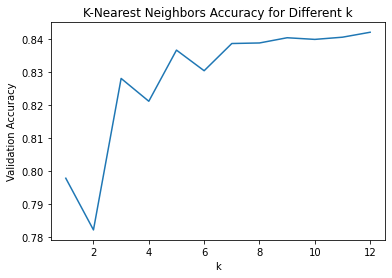

In [142]:
import matplotlib.pyplot as plt

# Create variables
k_list = range(1, 13)
accuracies = []

for k in k_list:
    # Create classifier with current k
    classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train classifier
    classifier.fit(training_data, training_labels)
    
    # Append accuracy to the list
    accuracy = classifier.score(validation_data, validation_labels)
    accuracies.append(accuracy)

# Plot the data
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('K-Nearest Neighbors Accuracy for Different k')
plt.show()



In [143]:
# Select a single row (e.g., the first row)
feature_cols = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']
single_row = okcupid[feature_cols].iloc[0]

# If necessary, preprocess the row (e.g., handle categorical variables, scale features)
# For example, if you used get_dummies or scaling, apply the same here

# Reshape the row to be a 2D array
single_row_reshaped = np.array(single_row).reshape(1, -1)

# Make a prediction
prediction = KNN.predict(single_row_reshaped)

print(f'Prediction for the single row: {prediction[0]}')




Prediction for the single row: 1


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [144]:
# Select rows 100 to 110
#feature_cols = ['age', 'drinks_rating', 'body_rating', 'diet_rating', 'drugs_rating', 'education_rating', 'ethnicity', 'height', 'income']
rows_100_to_110 = okcupid[feature_cols].iloc[100:102]  # Select rows 100 to 110

# Make predictions
predictions = KNN.predict(rows_100_to_110)

# Print predictions
for i, predict in enumerate(predictions, start=100):
    print(f'Prediction for row {i}: {predict}')


Prediction for row 100: 1
Prediction for row 101: 1


# Decision Trees

In [145]:
# Split the data into a train and test set

train_data, test_data, train_labels, test_labels = train_test_split(X, y, random_state=1, test_size=.4)

In [146]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

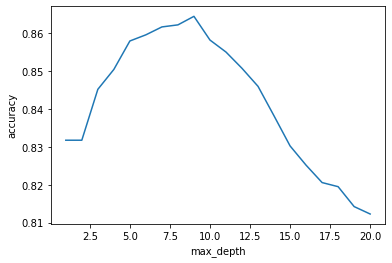

In [147]:
#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [148]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 86.4% at depth 9


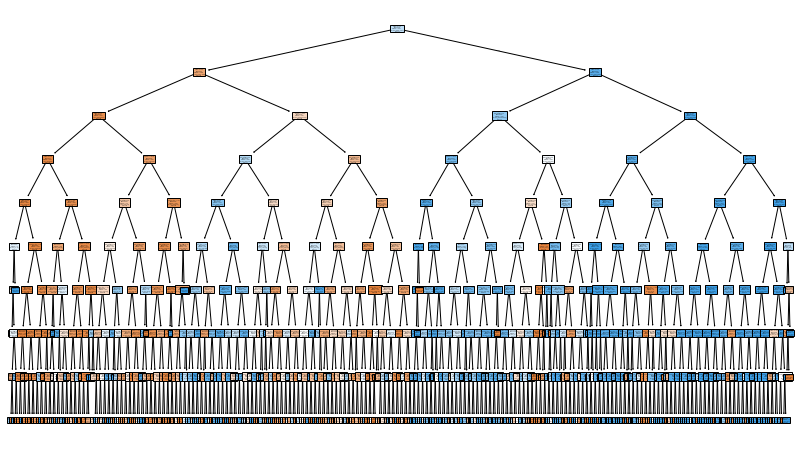

In [149]:
#Refit decision tree model with the highest accuracy and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(train_data, train_labels)
tree.plot_tree(dt, feature_names = train_data.columns,  
               class_names = ['M', 'F'],
                filled=True)
plt.show()

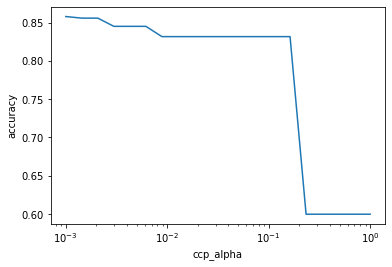

In [150]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list

acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

In [151]:
#Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')



Highest accuracy 85.8% at ccp_alpha 0.001


In [152]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp)
dt_final.fit(train_data, train_labels)



DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, random_state=1)

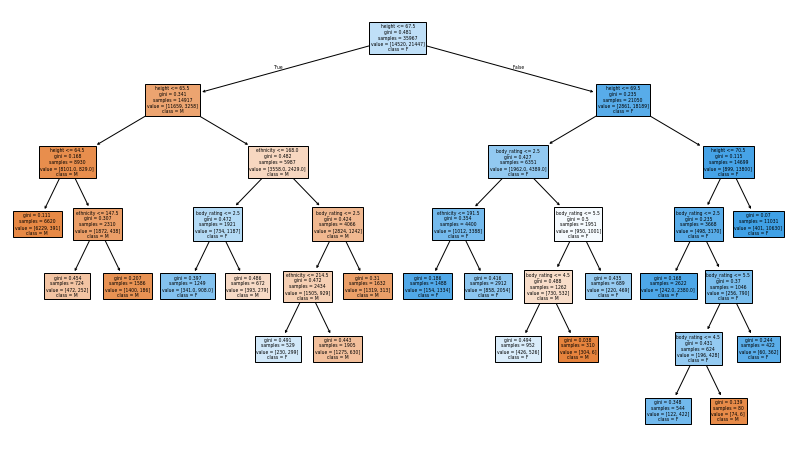

In [153]:
#Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names = train_data.columns,  
               class_names = ['M', 'F'],
                filled=True)
plt.show()

Confusion Matrix:
[[ 7846  1751]
 [ 1499 12883]]


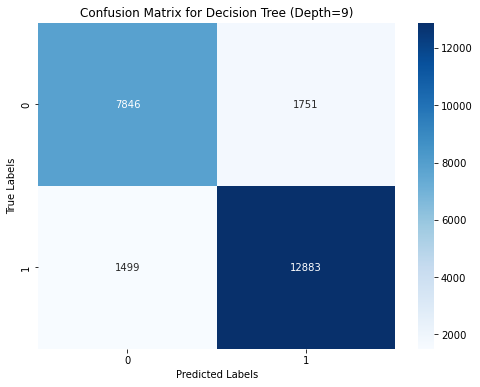

In [154]:
# Make predictions on the test data
predictions = dt.predict(test_data)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Decision Tree (Depth={best_depth})')
plt.show()


In [155]:
# Calculate accuracy
# Accuracy is calculated by finding the total number of correctly classified predictions (true positives and true negatives) 
# and dividing by the total number of predictions.

accuracy = accuracy_score(test_labels, predictions)

print(f'Accuracy for Decision Tree (Depth={best_depth}): {accuracy:.2f}')

Accuracy for Decision Tree (Depth=9): 0.86


In [156]:
# calculate the Recall
# Accuracy can be misleading, 
# recall = true_positives/(true_positives + false_negatives) 
# this would be the number of correctly labeled spam emails divided by all the emails that were actually spam in the dataset.

from sklearn.metrics import recall_score

recall = recall_score(test_labels, predictions, average='binary')

print(f'Recall for Decision Tree (Depth={best_depth}): {recall:.2f}')

Recall for Decision Tree (Depth=9): 0.90


In [157]:
# Calculate precision
# Precision measures the proportion of positive identifications that were actually correct.
# precision = true_positives/(true_positives + false_positives)
#  precision is particularly useful when the cost of false positives is high, 
# and it helps ensure that positive predictions are trustworthy.

precision = precision_score(test_labels, predictions, average='binary')

print(f'Precision for Decision Tree (Depth={best_depth}): {precision:.2f}')

Precision for Decision Tree (Depth=9): 0.88


In [158]:
# Calculate F1 score
# f_1 = 2*precision*recall/(precision+recall)
# Arithmetic mean = precision*recall / 2
# The F1-score combines both precision and recall into a single statistic, by determining their harmonic mean. The harmonic mean is a 
# method of averaging.

# Calculate F1 score
f1 = f1_score(test_labels, predictions, average='binary')

print(f'F1 Score for Decision Tree (Depth={best_depth}): {f1:.2f}')

F1 Score for Decision Tree (Depth=9): 0.89


#  Random Forest Classifier

In [159]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

feature_cols = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']
   

#Create feature dataframe X with feature columns and dummy variables for categorical features
X = pd.get_dummies(okcupid[feature_cols])

#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k

y_status = okcupid['status'] 

#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y_status, random_state=1, test_size=.4)




In [160]:
#Instantiate random forest classifier, fit and score with default parameters
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)
print(f'Accuracy score for default random forest: {round(rf.score(x_test, y_test)*100,3)}%')

#Tune the hyperparameter max_depth over a range from 1-25, save scores for test and train set
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
depths = range(1,26)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))
    
#Find the best accuracy and at what depth that occurs
best_acc= np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')






Accuracy score for default random forest: 92.685%
The highest accuracy on the test is achieved when depth: 1
The highest accuracy on the test set is: 93.102%


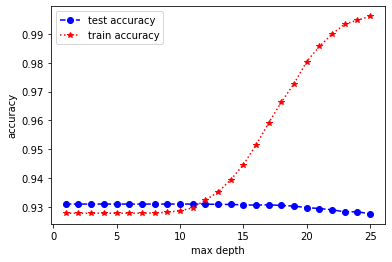

In [161]:
#Plot the accuracy scores for the test and train set over the range of depth values  
plt.plot(depths, accuracy_test,'bo--',depths, accuracy_train,'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()



In [162]:
#Save the best random forest model and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 9 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:9])

Top 9 random forest features:
            feature  importance
4      drugs_rating        0.33
2       body_rating        0.20
3       diet_rating        0.19
1     drinks_rating        0.15
6         ethnicity        0.05
0               age        0.04
5  education_rating        0.04
7            height        0.00
8            income        0.00


Adpative boosting 

In [163]:
from sklearn.ensemble import AdaBoostClassifier

# Create a decision stump base model using the Decision Tree Classifier
decision_stump = DecisionTreeClassifier(max_depth=1)

# Print the parameters of the decision stump
print(decision_stump.get_params())


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [164]:
# Create an AdaBoost classifier using the decision stump as the base estimator
ada_classifier = AdaBoostClassifier(estimator=decision_stump, n_estimators=5)

# Print the parameters of the AdaBoost model
print(ada_classifier.get_params())



{'algorithm': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 5, 'random_state': None}


In [165]:
# Fit the AdaBoost classifier to the training data
ada_classifier.fit(x_train, y_train)

# Predict the classes of the testing dataset
y_pred = ada_classifier.predict(x_test)


In [166]:
# Calculate the accuracy, precision, recall, and f1-score on the testing data
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Test set accuracy:\t{accuracy}')
#print(f'Test set precision:\t{precision}')
#print(f'Test set recall:\t{recall}')
#print(f'Test set f1-score:\t{f1}')



Test set accuracy:	0.9310229784394679


In [167]:
# Remove the comments from the following code block to print the confusion matrix

test_conf_matrix = pd.DataFrame(
     confusion_matrix(y_test, y_pred, labels=[1, 0]), 
     index=['actual yes', 'actual no'], 
     columns=['predicted yes', 'predicted no']
 )
print(f'Confusion Matrix:\n{test_conf_matrix.to_string()}')

Confusion Matrix:
            predicted yes  predicted no
actual yes              0             0
actual no               0             0


Gradient Boost 

In [168]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Create a Gradient Boosting Classifier and print its parameters
grad_classifier = GradientBoostingClassifier(n_estimators=15)

print(grad_classifier.get_params())

# 2. Fit the Gradient Boosted Trees Classifier to the training data and get the list of predictions
grad_classifier.fit(x_train, y_train)
y_pred = grad_classifier.predict(x_test)



{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [169]:
# 3. Calculate the accuracy, precision, recall, and f1-score on the testing data
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)

print(f'Test set accuracy:\t{accuracy}')
#print(f'Test set precision:\t{precision}')
#print(f'Test set recall:\t{recall}')
#print(f'Test set f1-score:\t{f1}')

# 4. Remove the comments from the following code block to print the confusion matrix
test_conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=[1, 0]), 
    index=['actual yes', 'actual no'], 
    columns=['predicted yes', 'predicted no']
)

print(f'Confusion Matrix:\n{test_conf_matrix.to_string()}')

Test set accuracy:	0.9298135868885274
Confusion Matrix:
            predicted yes  predicted no
actual yes              0             0
actual no               0             0


# Stacking => read the article

# Support Vector Machines

In [170]:
# This algorithm will depend on the patten of the data and how speperated it is
# from the pairplot above 

In [ ]:
# Import Libraries: Use pandas for data handling and scikit-learn for the SVM model.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



In [ ]:
# Prepare Data: Select features and the target label.

feature_cols = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']

features = data[['feature1', 'feature2']]  # Replace with relevant features
labels = data['single']  # Assuming 'single' is the target column


In [ ]:
# Split Data: Divide the data into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)



In [ ]:
# Create and Train SVM Model: Initialize and fit the model with probability enabled.

model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)


In [ ]:
# Calculate Probabilities: Use the model to predict probabilities.

probabilities = model.predict_proba(X_test)


In [ ]:
# Output Probabilities: Print the probabilities for each class.



#### Plotting the decision boundary

In [ ]:
#Train the SVM Model: Ensure you have a trained SVM model with two features for visualization.

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

feature_cols = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']
   

#Create feature dataframe X with feature columns and dummy variables for categorical features
X = pd.get_dummies(okcupid[feature_cols])

#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k

y_status = okcupid['status'] 

# Assuming 'features' and 'labels' are defined
X_train, X_test, y_train, y_test = train_test_split(X, y_status, test_size=0.2, random_state=1)

model = SVC(kernel='linear')  # Use 'linear' for simplicity in plotting
model.fit(X_train, y_train)


In [104]:
# Create a Meshgrid: Generate a grid of points to plot the decision boundary.

x_min, x_max = X_train['feature1'].min() - 1, X_train['feature1'].max() + 1
y_min, y_max = X_train['feature2'].min() - 1, X_train['feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


KeyError: 'feature1'

In [ ]:
# Plot Decision Boundary: Use the model to predict on the grid and plot.

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')


In [ ]:
# Plot Data Points and Support Vectors: Plot the training data and highlight support vectors.

plt.scatter(X_train['feature1'], X_train['feature2'], c=y_train, cmap='coolwarm', edgecolors='k')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')



In [ ]:
# Show Plot: Display the plot with labels.

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


# Recommender Systems

### Use this algorithm to predict the likely match of two people

In [ ]:
import pandas as pd
#import codecademylib3
#from surprise import Reader

#Makes training set and validation set.
training_data, validation_data, training_labels, validation_labels = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

#7. Use KNNBasice from Surprise to train a collaborative filter
from surprise import KNNBasic
nn_algo = KNNBasic()
nn_algo.fit(trainset)

#8. Evaluate the recommender system
from surprise import accuracy
predictions = nn_algo.test(testset)
accuracy.rmse(predictions)


# Naive Bayes Classifier

The ultimate aim is to predict the probability of two particular groups of people with similar characteristics becomming a match. For example, two people that like cycling may be a good matach. Also we could predict the likely hood that a person will remain single or move into a long term relationship based of a numer of key characteristics. 

Using the Naive-Bayes theorem we could calculate the probability the a client will remain single and the probability that the client will not remain single. 

For example, let’s say we’re trying to classify an email as either spam or not spam. We could calculate P(spam | email) and P(not spam | email). Whichever probability is higher will be the classifier’s prediction. Naive Bayes classifiers are often used for text classification.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [ ]:


features = data[['feature1', 'feature2']]  # Replace with relevant features
labels = data['single']  # Assuming 'single' is the target column


In [ ]:
# Split Data: Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)


In [ ]:
# Create and Train Naive Bayes Model: Initialize and fit the model.

model = GaussianNB()
model.fit(X_train, y_train)


In [ ]:
# Calculate Probabilities: Use the model to predict probabilities.
probabilities = model.predict_proba(X_test)


In [ ]:
# Output Probabilities: Print the probabilities for each class.

for i, prob in enumerate(probabilities):
    print(f"Sample {i}: Probability of remaining single: {prob[1]:.2f}, Probability of not remaining single: {prob[0]:.2f}")


# Deep Learning 

In [ ]:
import codecademylib3_seaborn
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

# Inputs to AND
data = [[0, 0], [0, 1], [1, 0], [1,1]] # this is a list of lists
# labels = [0,      0,      0,       1] # this represent an AND gate
# labels = [0,      1,      1,       0] # this represent an XOR gate. should get a score of 0.5 which mean the data is not linear 
                                        # seperatble. 
labels = [0,      1,      1,       1]# this represent and OR gate

plt.scatter([point[0] for point in data],
            [point[0] for point in data],
            c = labels)

classifier = Perceptron(max_iter = 40) # perceptron object 
classifier.fit(data, labels) # this is going to train the peceptron and the perceptron is going to iterate through the data 40 times 
                             # and constantly adjust the weights. 

x_values = np.linspace(0,1, 100)
y_values = np.linspace(0,1, 100)
point_grid = list(product(x_values, y_values))

distances = classifier.decision_function(point_grid)
# generate a list of point which can be used to determin how far the point are from the decision boundary and thus provide a heat map. 

abs_distances = [abs(pt) for pt in distances] # the absolute value for a point for evey point in the distances list

distances_matrix = np.reshape(abs_distances, (100, 100)) # the abs_distance is a one dimensional array and we need to make it a two 
                                                          # dimensional array. numpy has a reshape function to this. 

print(classifier.score(data, labels)) # this is what is going to run the algorithm. 
print(classifier.decision_function([[0, 0], [1, 1], [0.5, 0.5]]))# the shows how far these point are from the decision boundary

heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
plt.colorbar(heatmap)

# ou now have a great visualization of what the perceptron is doing. You should see a purple line where the distances are 0. 
# That’s the decision boundary!
# Change your labels back to representing an OR gate. Where does the decision boundary go?
# Change your labels to represent an XOR gate. Remember, this data is not linearly separable. Where does the decision boundary go?
# Perceptrons can’t solve problems that aren’t linearly separable. However, if you combine multiple perceptrons together, you now have 
# a neural net that can solve these problems!
# This is incredibly similar to logic gates. AND gates and OR gates can’t produce the output of XOR gates, but when you combine a few 
# ANDs and ORs, you can make an XOR!

plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np


# Initialize and train a Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=1)
perceptron.fit(x_train, y_train)

# Evaluate the model
y_pred = perceptron.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Example: Get decision function scores
decision_scores = perceptron.decision_function(x_test[:5])
print(f"Decision Function Scores: {decision_scores}")

# Visualization (optional if only two features are used)
if x_train.shape[1] == 2:  # Check if the input has only 2 features
    import matplotlib.pyplot as plt
    from itertools import product

    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    zz = perceptron.decision_function(grid_points).reshape(xx.shape)

    plt.contourf(xx, yy, zz, levels=[-1, 0, 1], alpha=0.3, cmap='coolwarm')
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
    plt.title("Perceptron Decision Boundary")
    plt.show()


ValueError: Input X contains NaN.
Perceptron does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values